# Telecom Churn case study

###### Problem Statement:

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
- For many incumbent operators, retaining high profitable customers is the number one business goal. 
- To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

###### Requirement:

- Analyse customer-level data of a leading telecom firm.
- Build predictive models to identify customers at high risk of churn.
- Identify the main indicators of churn.

###### Import Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
pd.set_option('float_format', '{:f}'.format)
%matplotlib inline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import PowerTransformer

# settings to see the data.
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option('display.max_colwidth', -1)

import warnings
warnings.filterwarnings('ignore')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  from ipykernel import kernelapp as app


In [2]:
# importing the data dictionary
dic = pd.read_excel("Data+Dictionary-+Telecom+Churn+Case+Study.xlsx")

## Data Dictionary

In [3]:
dic

,Acronyms,Descriptions
0,MOBILE_NUMBER,Customer phone number
1,CIRCLE_ID,Telecom circle area to which the customer belongs to
2,LOC,Local calls - within same telecom circle
3,STD,STD calls - outside the calling circle
4,IC,Incoming calls
5,OG,Outgoing calls
6,T2T,"Operator T to T, i.e. within same operator (mobile to mobile)"
7,T2M,Operator T to other operator mobile
8,T2O,Operator T to other operator fixed line
9,T2F,Operator T to fixed lines of T


In [4]:
#Read the telecom churn csv file
telecom_churn_df = pd.read_csv("telecom_churn_data.csv")

In [5]:
telecom_churn_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.000000,0.000000,0.000000,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385000,214.816000,213.803000,21.100000,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,nan,nan,0.000000,nan,0.000000,0.000000,0.000000,0.000000,nan,nan,0.160000,nan,nan,nan,4.130000,nan,nan,nan,1.150000,nan,nan,nan,5.440000,nan,nan,nan,0.000000,nan,nan,n

### Get unique elements in column

In [6]:
unique = telecom_churn_df.nunique()
unique

mobile_number               99999
circle_id                   1    
loc_og_t2o_mou              1    
std_og_t2o_mou              1    
loc_ic_t2o_mou              1    
last_date_of_month_6        1    
last_date_of_month_7        1    
last_date_of_month_8        1    
last_date_of_month_9        1    
arpu_6                      85681
arpu_7                      85308
arpu_8                      83615
arpu_9                      79937
onnet_mou_6                 24313
onnet_mou_7                 24336
onnet_mou_8                 24089
onnet_mou_9                 23565
offnet_mou_6                31140
offnet_mou_7                31023
offnet_mou_8                30908
offnet_mou_9                30077
roam_ic_mou_6               6512 
roam_ic_mou_7               5230 
roam_ic_mou_8               5315 
roam_ic_mou_9               4827 
roam_og_mou_6               8038 
roam_og_mou_7               6639 
roam_og_mou_8               6504 
roam_og_mou_9               5882 
loc_og_t2t_mou

In [7]:
#Eliminate columns with just 1 value
telecom_churn_df = telecom_churn_df[unique.index[unique.values>1]]

In [8]:
#Check for null values in the data columnwise
perc_na=round(100*(telecom_churn_df.isnull().sum()/len(telecom_churn_df.index)), 2)

In [9]:
header=['Name']
perc_na_df=pd.DataFrame(perc_na,columns=header)

In [10]:
#Columns having 0-5% null values
na_5 = perc_na_df[(perc_na_df['Name']<5.000) & (perc_na_df['Name']>00.00)]

In [11]:
#Columns having 5-10% null values
na_10 = perc_na_df[(perc_na_df['Name']<10.000) & (perc_na_df['Name']>05.00)]

In [12]:
#Columns having more than 70% null values
na_70 = perc_na_df[(perc_na_df['Name']>70.00)]

In [13]:
#Check for columns having between 10-70% null values
perc_na_df[(perc_na_df['Name']>10.000) & (perc_na_df['Name']<70.000)]

,Name


#### No Columns with 10-70% Null values

In [14]:
#Find the columns which have more than 70% null values
perc_na_df[perc_na_df['Name']>70.000].count()

Name    40
dtype: int64

In [15]:
#Check unique values of each column having null vlaues greater than 70%
print("date_of_last_rech_data_6 --", telecom_churn_df.date_of_last_rech_data_6.unique())
print("date_of_last_rech_data_7 --", telecom_churn_df.date_of_last_rech_data_7.unique())
print("date_of_last_rech_data_8 --", telecom_churn_df.date_of_last_rech_data_8.unique())
print("date_of_last_rech_data_9 --", telecom_churn_df.date_of_last_rech_data_9.unique())
print("-"*100)
print("count_rech_2g_6 --", telecom_churn_df.count_rech_2g_6.unique())
print("count_rech_2g_7 --", telecom_churn_df.count_rech_2g_7.unique())
print("count_rech_2g_8 --", telecom_churn_df.count_rech_2g_8.unique())
print("count_rech_2g_9 --", telecom_churn_df.count_rech_2g_9.unique())
print("-"*100)
print("count_rech_3g_6 --", telecom_churn_df.count_rech_3g_6.unique())
print("count_rech_3g_7 --", telecom_churn_df.count_rech_3g_7.unique())
print("count_rech_3g_8 --", telecom_churn_df.count_rech_3g_8.unique())
print("count_rech_3g_9 --", telecom_churn_df.count_rech_3g_9.unique())
print("-"*100)
print("total_rech_data_6 --", telecom_churn_df.total_rech_data_6.unique())
print("total_rech_data_7 --", telecom_churn_df.total_rech_data_7.unique())
print("total_rech_data_8 --", telecom_churn_df.total_rech_data_8.unique())
print("total_rech_data_9 --", telecom_churn_df.total_rech_data_9.unique())
print("-"*100)
print("max_rech_data_6 --", telecom_churn_df.max_rech_data_6.unique())
print("max_rech_data_7 --", telecom_churn_df.max_rech_data_7.unique())
print("max_rech_data_8 --", telecom_churn_df.max_rech_data_8.unique())
print("max_rech_data_9 --", telecom_churn_df.max_rech_data_9.unique())
print("-"*100)
print("arpu_2g_6 --", telecom_churn_df.arpu_2g_6.unique())
print("arpu_2g_7 --", telecom_churn_df.arpu_2g_7.unique())
print("arpu_2g_8 --", telecom_churn_df.arpu_2g_8.unique())
print("arpu_2g_9 --", telecom_churn_df.arpu_2g_9.unique())
print("-"*100)
print("arpu_3g_6 --", telecom_churn_df.arpu_3g_6.unique())
print("arpu_3g_7 --", telecom_churn_df.arpu_3g_7.unique())
print("arpu_3g_8 --", telecom_churn_df.arpu_3g_8.unique())
print("arpu_3g_9 --", telecom_churn_df.arpu_3g_9.unique())
print("-"*100)
print("night_pck_user_6 --", telecom_churn_df.night_pck_user_6.unique())
print("night_pck_user_7 --", telecom_churn_df.night_pck_user_7.unique())
print("night_pck_user_8--", telecom_churn_df.night_pck_user_8.unique())
print("night_pck_user_9 --", telecom_churn_df.night_pck_user_9.unique())
print("-"*100)
print("fb_user_6 --", telecom_churn_df.fb_user_6.unique())
print("fb_user_7 --", telecom_churn_df.fb_user_7.unique())
print("fb_user_8 --", telecom_churn_df.fb_user_8.unique())
print("fb_user_9 --", telecom_churn_df.fb_user_9.unique())
print("-"*100)

date_of_last_rech_data_6 -- ['6/21/2014' nan '6/4/2014' '6/27/2014' '6/30/2014' '6/6/2014' '6/2/2014'
 '6/12/2014' '6/19/2014' '6/29/2014' '6/5/2014' '6/17/2014' '6/11/2014'
 '6/25/2014' '6/10/2014' '6/20/2014' '6/23/2014' '6/13/2014' '6/26/2014'
 '6/16/2014' '6/14/2014' '6/24/2014' '6/28/2014' '6/15/2014' '6/9/2014'
 '6/22/2014' '6/1/2014' '6/8/2014' '6/7/2014' '6/18/2014' '6/3/2014']
date_of_last_rech_data_7 -- ['7/16/2014' '7/25/2014' nan '7/31/2014' '7/23/2014' '7/7/2014'
 '7/27/2014' '7/2/2014' '7/28/2014' '7/12/2014' '7/4/2014' '7/5/2014'
 '7/6/2014' '7/26/2014' '7/19/2014' '7/10/2014' '7/11/2014' '7/29/2014'
 '7/18/2014' '7/9/2014' '7/24/2014' '7/14/2014' '7/13/2014' '7/22/2014'
 '7/30/2014' '7/20/2014' '7/21/2014' '7/15/2014' '7/8/2014' '7/17/2014'
 '7/1/2014' '7/3/2014']
date_of_last_rech_data_8 -- ['8/8/2014' '8/10/2014' nan '8/23/2014' '8/24/2014' '8/21/2014'
 '8/30/2014' '8/6/2014' '8/25/2014' '8/7/2014' '8/26/2014' '8/11/2014'
 '8/2/2014' '8/31/2014' '8/20/2014' '8/29/2014

## Data Cleaning

In [16]:
#As Night pack user and fb user columns have only 0 and 1s. Let's impute by adding min value
for column in telecom_churn_df.filter(regex ='user').columns:
    telecom_churn_df[column].replace(np.nan, 0, inplace = True)

In [17]:
# drop column with > 70% missing values
telecom_churn_df.drop(na_70.index, axis=1, inplace=True)

In [18]:
#After imputing all the variables having null values more than 70%, let's verify the null values which are above 70%
perc_na=round(100*(telecom_churn_df.isnull().sum()/len(telecom_churn_df.index)), 2)
perc_na.where(perc_na>10).count()

0

In [19]:
telecom_churn_df.shape

(99999, 170)

In [20]:
round(100*(telecom_churn_df.isnull().sum()/len(telecom_churn_df.index)), 2).max()

7.75

In [21]:
#impute date columns
date_columns = telecom_churn_df.filter(regex ='date').columns

In [22]:
for d in date_columns:
    telecom_churn_df[d] = pd.to_datetime(telecom_churn_df[d]).dt.day
    telecom_churn_df[d].fillna(int(telecom_churn_df[d].mean()), inplace=True)

In [23]:
#check the type of  variables in data frame
telecom_churn_df.dtypes.value_counts()

float64    136
int64      34 
dtype: int64

### Impute columns where nan values % is less than 10

In [24]:
#impute the missing values for variables having upto 10%
perc_na_df_10=perc_na_df[(perc_na_df['Name']<10) & (perc_na_df['Name']>0)]
perc_na_df_10.count()

Name    112
dtype: int64

In [25]:
columns_name = telecom_churn_df.columns

In [26]:
# Impute remaining values using iterative imputer
telecom_churn_df = pd.DataFrame(IterativeImputer().fit_transform(telecom_churn_df))

In [27]:
#Check if null values exist
telecom_churn_df.isnull().sum().sum()

0

In [28]:
telecom_churn_df.columns = columns_name
telecom_churn_df.shape

(99999, 170)

### Find the High Value Customer

In [29]:
telecom_churn_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753.000000,197.385000,214.816000,213.803000,21.100000,-44.438846,-16.626866,0.000000,-32.636002,186.655299,174.503611,0.000000,172.488335,33.384532,21.765562,0.000000,21.134726,13.974059,5.455430,0.000000,3.273252,41.044255,27.189194,0.000000,34.820114,93.338748,91.389180,0.000000,90.477186,3.750135,3.797967,0.000000,3.644057,-7.824020,-14.679530,0.000000,-10.582695,5.198303,-12.594708,0.000000,-21.350598,92.110841,93.503706,0.000000,94.645494,87.320079,90.814239,0.000000,86.263520,1.118702,1.135971,0.000000,1.061299,120.781694,126.611544,0.000000,121.905521,-115.831344,-103.626990,0.000000,-98.276609,3.913850,4.976152,0.000000,4.408990,0.447684,0.044528,0.000000,0.047781,0.000000,0.000000,0.000000,0.000000,52.800821,40.624130,0.160000,58.438659,107.473783,107.125238,4.130000,106.147795,12.086093,12.596100,1.150000,12.177876,65.961363,59.068858,5.440000,64.518296,23.228052,19.657786,0.000000,25.825677,20.723433,21.653819,0.000000,19.619742,2.154774,2.218485,0.000000,2.174294,0.435794,0.481675,0.000000,-0.008085,0.000000,0.000000,5.440000,0.000000,-66.943103,-65.639412,0.000000,-67.024243,7.807901,8.252711,0.000000,8.080566,0.853854,1.012354,0.000000,1.016973,4.000000,3.000000,2.000000,6.000000,362.000000,252.000000,252.000000,0.000000,252.000000,252.000000,252.000000,0.000000,21.000000,16.000000,8.000000,28.000000,252.000000,252.000000,252.000000,0.000000,30.130000,1.320000,5.750000,0.000000,83.570000,150.760000,109.610000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

#### Get total recharge amount for 6th and 7th months - Good phase

In [30]:
telecom_churn_df.total_rech_amt_avg = (telecom_churn_df.total_rech_amt_6 +telecom_churn_df.total_rech_amt_7)/2

##### Find total recharge amount for 6th and 7th months - Good phase

In [31]:
#Finding good phase for filtering HVC
telecom_churn_df.total_rech_amt_good_phase=(telecom_churn_df.total_rech_amt_avg)

In [32]:
telecom_churn_df.total_rech_amt_good_phase.describe()

count   99999.000000
mean    325.238792  
std     370.833466  
min     0.000000    
25%     115.000000  
50%     229.000000  
75%     419.000000  
max     37762.500000
dtype: float64

Compute the 70 percentile of High Value Customer data set

In [33]:
_70percentile = telecom_churn_df.total_rech_amt_good_phase.quantile(q=0.7)

In [34]:
print(_70percentile)

368.5


##### Fetching High Value customer of more than 70th percentile(inclusive) of data set

In [35]:
telecom_churn_df_high = telecom_churn_df[(telecom_churn_df.total_rech_amt_good_phase >= _70percentile)]

In [36]:
telecom_churn_df_high.describe()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.

In [37]:
round(100*(telecom_churn_df_high.isnull().sum()/len(telecom_churn_df_high.index)), 2)

mobile_number         0.000000
arpu_6                0.000000
arpu_7                0.000000
arpu_8                0.000000
arpu_9                0.000000
onnet_mou_6           0.000000
onnet_mou_7           0.000000
onnet_mou_8           0.000000
onnet_mou_9           0.000000
offnet_mou_6          0.000000
offnet_mou_7          0.000000
offnet_mou_8          0.000000
offnet_mou_9          0.000000
roam_ic_mou_6         0.000000
roam_ic_mou_7         0.000000
roam_ic_mou_8         0.000000
roam_ic_mou_9         0.000000
roam_og_mou_6         0.000000
roam_og_mou_7         0.000000
roam_og_mou_8         0.000000
roam_og_mou_9         0.000000
loc_og_t2t_mou_6      0.000000
loc_og_t2t_mou_7      0.000000
loc_og_t2t_mou_8      0.000000
loc_og_t2t_mou_9      0.000000
loc_og_t2m_mou_6      0.000000
loc_og_t2m_mou_7      0.000000
loc_og_t2m_mou_8      0.000000
loc_og_t2m_mou_9      0.000000
loc_og_t2f_mou_6      0.000000
loc_og_t2f_mou_7      0.000000
loc_og_t2f_mou_8      0.000000
loc_og_t

##### Including churn information to dataframe

In [38]:
telecom_churn_df_high['usage_9'] = telecom_churn_df_high['total_ic_mou_9'] + telecom_churn_df_high['total_og_mou_9'] + telecom_churn_df_high['vol_3g_mb_9'] + telecom_churn_df_high['vol_2g_mb_9']

##### Get the churn data from 9th(Sept) month of data

In [39]:
telecom_churn_df_high["churn_data"] = [1 if value == 0 else 0 for value in telecom_churn_df_high.usage_9]

In [40]:
telecom_churn_df_high["churn_data"].describe()

count   30011.000000
mean    0.086402    
std     0.280961    
min     0.000000    
25%     0.000000    
50%     0.000000    
75%     0.000000    
max     1.000000    
Name: churn_data, dtype: float64

Review the churn data percentage 

In [41]:
(telecom_churn_df_high["churn_data"].sum()/telecom_churn_df_high["churn_data"].count())*100

8.64016527273333

Dropping 9th(Sept) month columns from data set 

In [42]:
drop_columns = telecom_churn_df_high.filter(regex ='9').columns
telecom_churn_df_high.drop(drop_columns, axis=1,inplace=True)

In [43]:
#Checking the shape of clean data after finding high value customers
telecom_churn_df_high.shape

(30011, 130)

## Derived metrics

In [44]:
# Find out ratio of revenue on happy/action phase
telecom_churn_df_high['arpu_ratio'] = ((telecom_churn_df_high.arpu_6 + telecom_churn_df_high.arpu_7)/2)/[1 if x ==0 else x for x in telecom_churn_df_high.arpu_8]

In [45]:
# Find out if customer centre call were made more in action phase
telecom_churn_df_high['call_centre_ratio'] = ((telecom_churn_df_high.loc_og_t2c_mou_6 + telecom_churn_df_high.loc_og_t2c_mou_7)/2)/[1 if x ==0 else x for x in telecom_churn_df_high.loc_og_t2c_mou_8]

In [46]:
# Find out ratio of usage from other network
telecom_churn_df_high['network_usage_diff'] = (telecom_churn_df_high.onnet_mou_8) - ( telecom_churn_df_high.offnet_mou_8)
# Find out ratio of usage from other network
telecom_churn_df_high['network_usage_diff_good'] = (telecom_churn_df_high.onnet_mou_6 + telecom_churn_df_high.onnet_mou_7 - telecom_churn_df_high.offnet_mou_6 - telecom_churn_df_high.offnet_mou_6)/2

In [47]:
# Find ratio of good/action for 2g
telecom_churn_df_high['2g_usage_ratio'] = ((telecom_churn_df_high.vol_2g_mb_6 + telecom_churn_df_high.vol_2g_mb_7)/2)/[1 if x ==0 else x for x in telecom_churn_df_high.vol_2g_mb_8]

In [48]:
# Find ratio of good/action for 3g
telecom_churn_df_high['3g_usage_ratio'] = ((telecom_churn_df_high.vol_3g_mb_6 + telecom_churn_df_high.vol_3g_mb_7)/2)/[1 if x ==0 else x for x in telecom_churn_df_high.vol_3g_mb_8]

In [49]:
# Find ratio of good/action for outgoing call
telecom_churn_df_high['og_ratio'] = ((telecom_churn_df_high.total_og_mou_6 + telecom_churn_df_high.total_og_mou_7)/2)/[1 if x ==0 else x for x in telecom_churn_df_high.total_og_mou_8]

In [50]:
# Find ratio of good/action for outgoing call
telecom_churn_df_high['ic_ratio'] = ((telecom_churn_df_high.total_ic_mou_6 + telecom_churn_df_high.total_ic_mou_7)/2)/[1 if x ==0 else x for x in telecom_churn_df_high.total_ic_mou_8]

In [51]:
# Find ratio of good/action for vbc
telecom_churn_df_high['vbc_difference'] = ((telecom_churn_df_high.jun_vbc_3g + telecom_churn_df_high.jul_vbc_3g)/2) - [1 if x ==0 else x for x in telecom_churn_df_high.aug_vbc_3g]

# Exploratory Data Analysis

In [52]:
# checking variance to see which columns hold most information
round(100*(np.var(telecom_churn_df_high.drop('mobile_number' , axis =1))/np.var(telecom_churn_df_high.drop('mobile_number' , axis =1)).sum()), 2).sort_values().tail()

vol_3g_mb_7   4.370000 
vol_3g_mb_8   4.400000 
vol_3g_mb_6   4.470000 
aon           5.670000 
arpu_ratio    12.250000
dtype: float64

In [53]:
telecom_churn_df_high.describe()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churn_data,arpu_ratio,call_centre_ratio,network_usage_diff,network_usage_diff_good,2g_usage_ratio,3g_usage_ratio,og_ratio,ic_ratio,vbc_difference
count,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000
mean,7001222923.595415,587.284404,589.135427,534.857433,295.569120,304.177482,266.231679,419.897852,425.689319,380.458604,17.777083,13.733325,14.501696,29.470346,22.092268,21.

# Univariate analysis

mobile_number


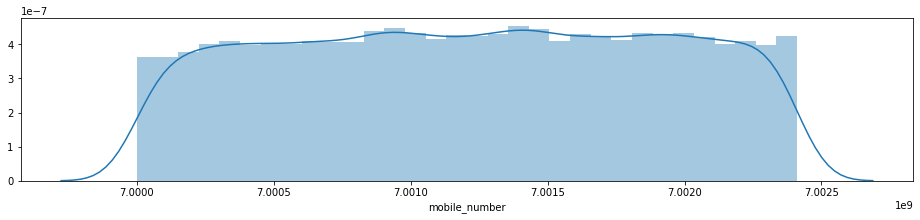

arpu_6


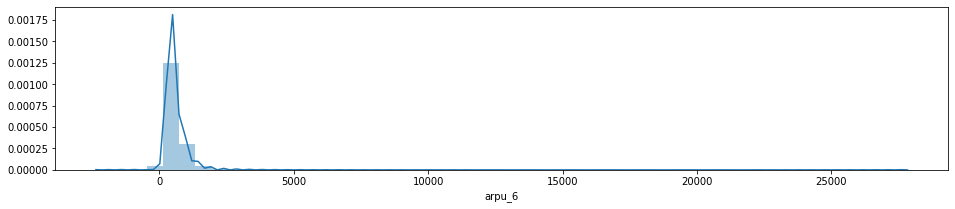

arpu_7


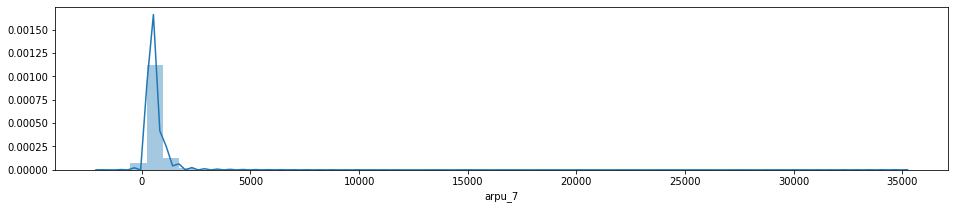

arpu_8


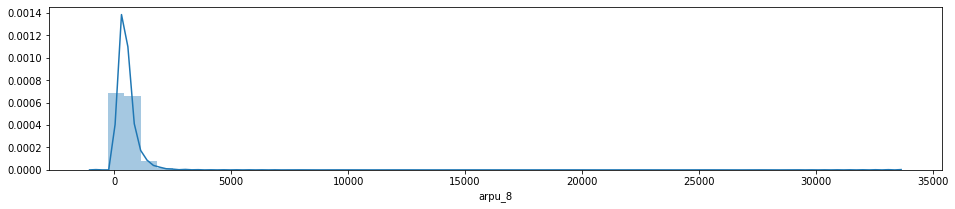

onnet_mou_6


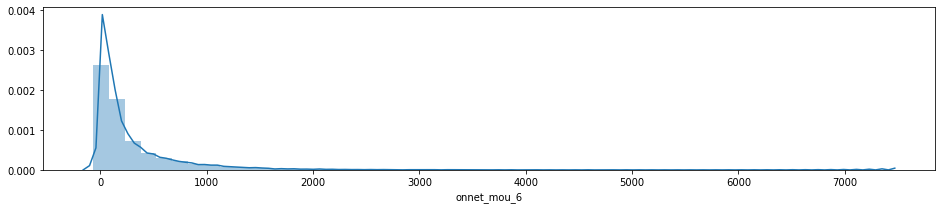

onnet_mou_7


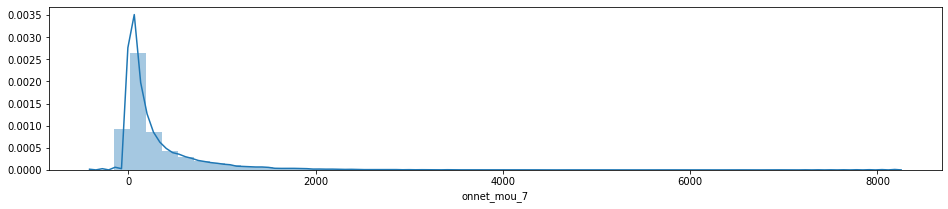

onnet_mou_8


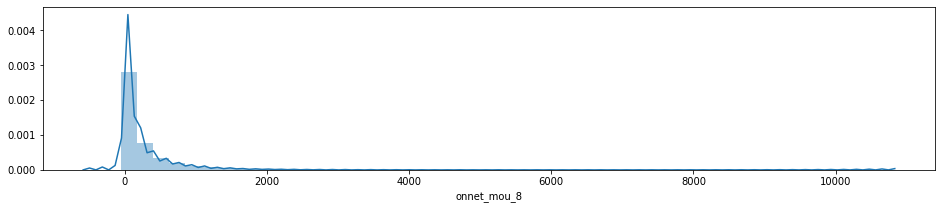

offnet_mou_6


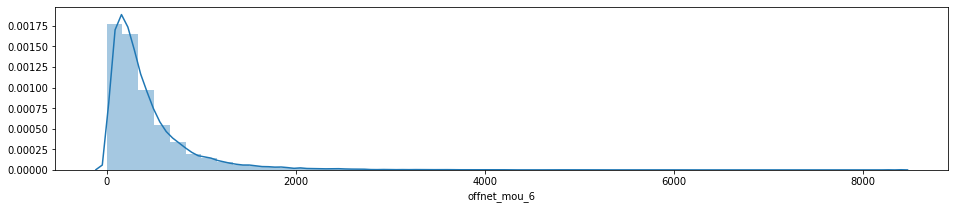

offnet_mou_7


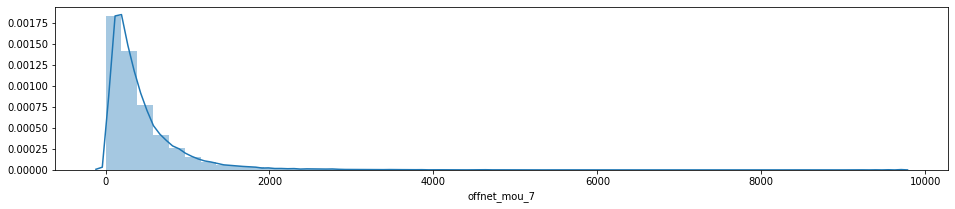

offnet_mou_8


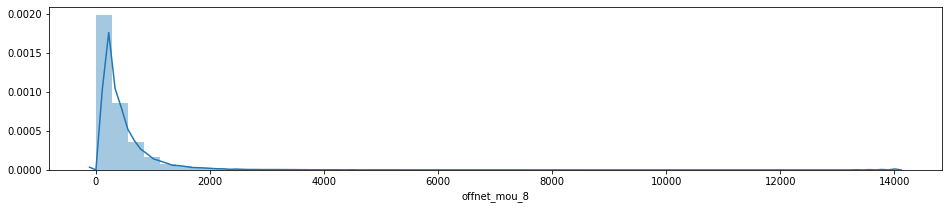

roam_ic_mou_6


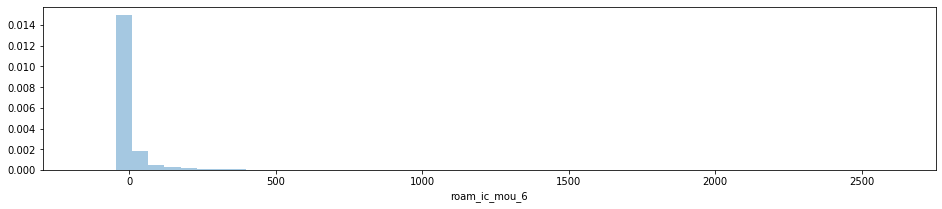

roam_ic_mou_7


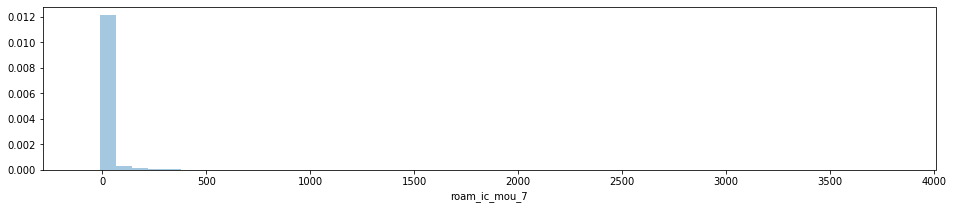

roam_ic_mou_8


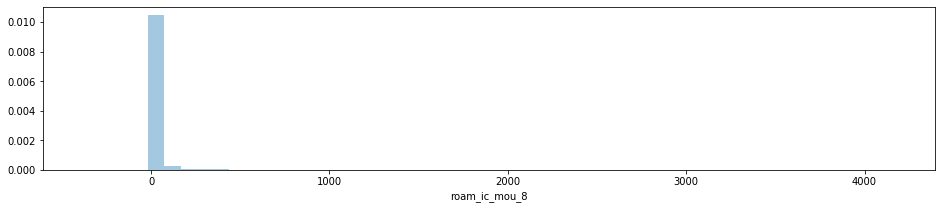

roam_og_mou_6


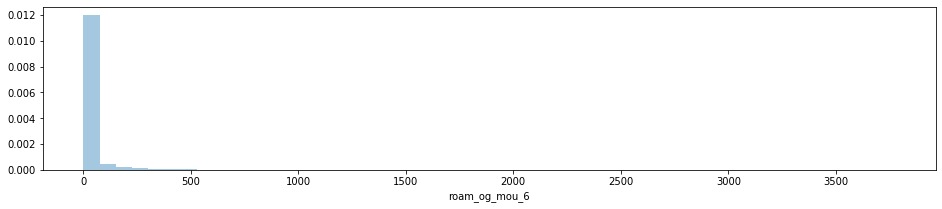

roam_og_mou_7


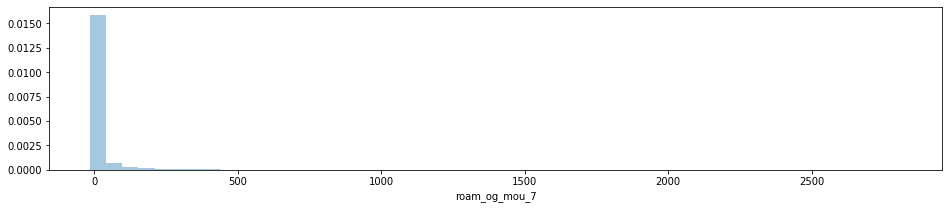

roam_og_mou_8


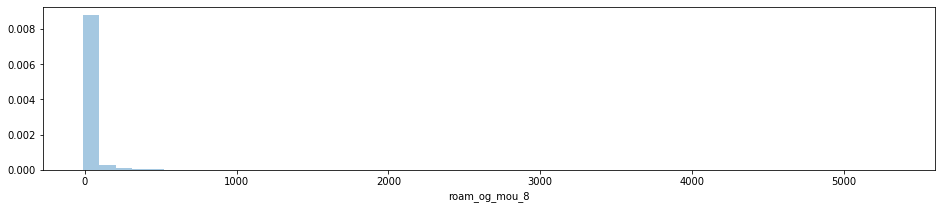

loc_og_t2t_mou_6


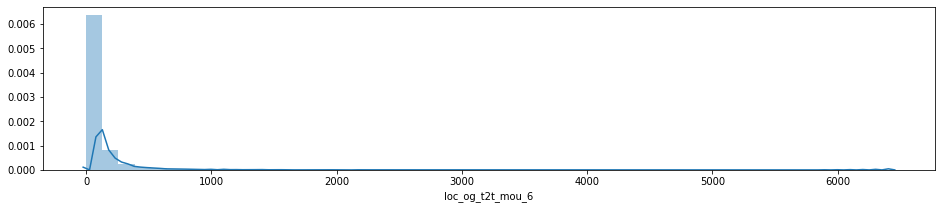

loc_og_t2t_mou_7


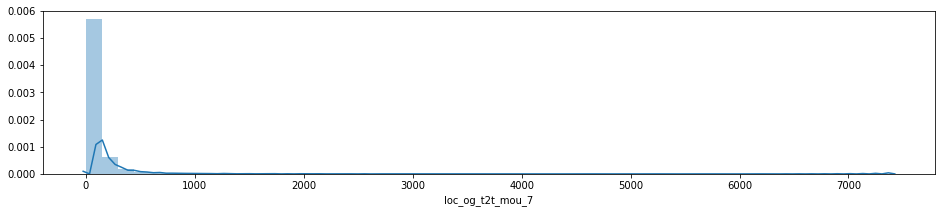

loc_og_t2t_mou_8


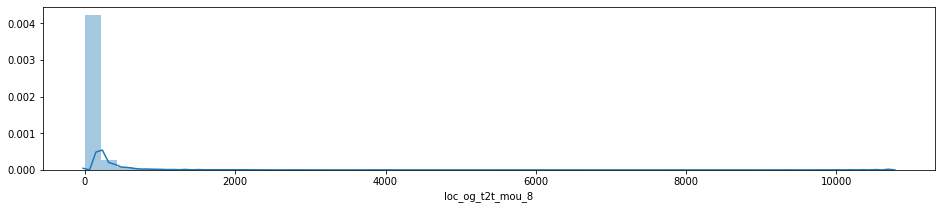

loc_og_t2m_mou_6


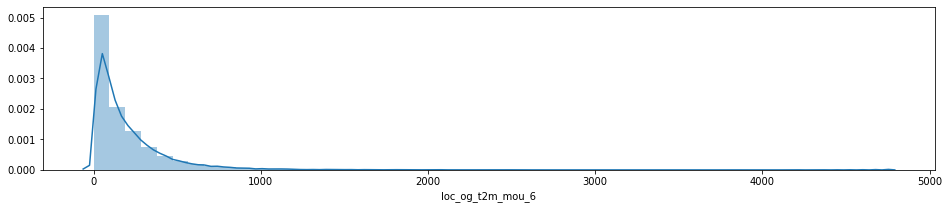

loc_og_t2m_mou_7


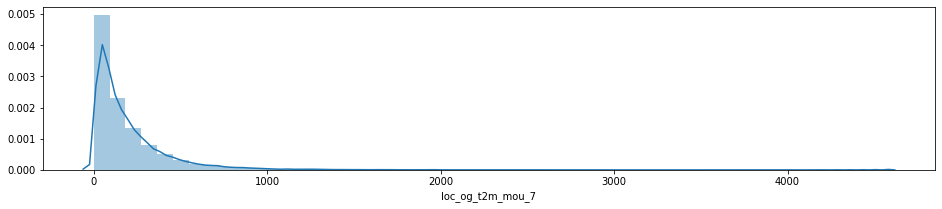

loc_og_t2m_mou_8


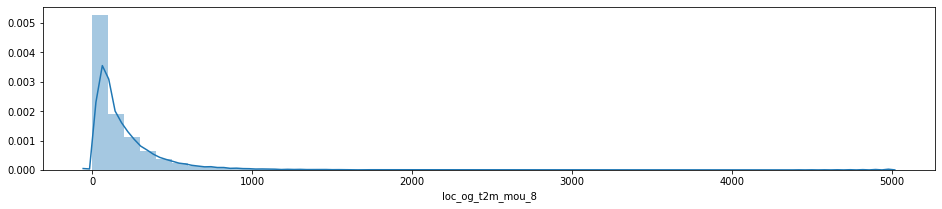

loc_og_t2f_mou_6


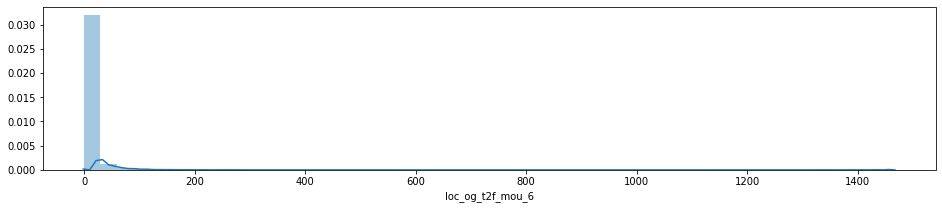

loc_og_t2f_mou_7


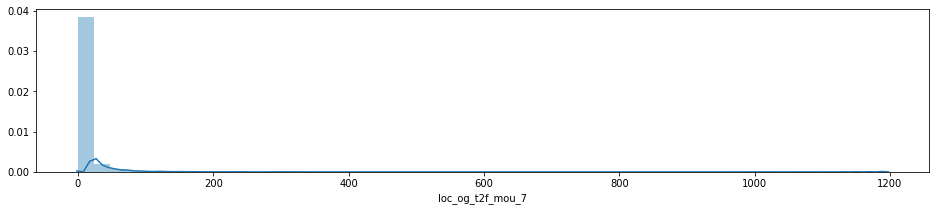

loc_og_t2f_mou_8


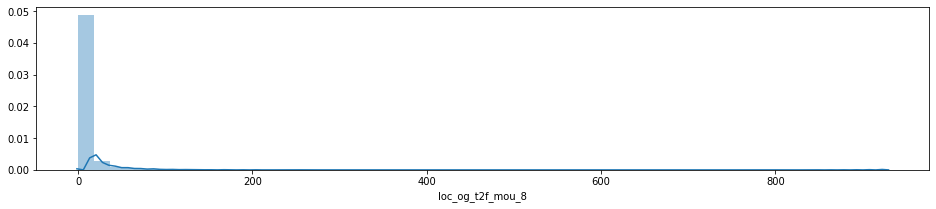

loc_og_t2c_mou_6


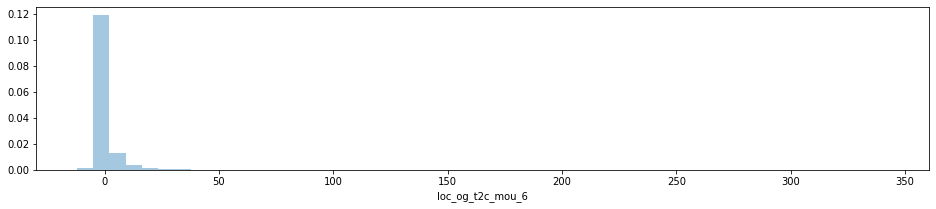

loc_og_t2c_mou_7


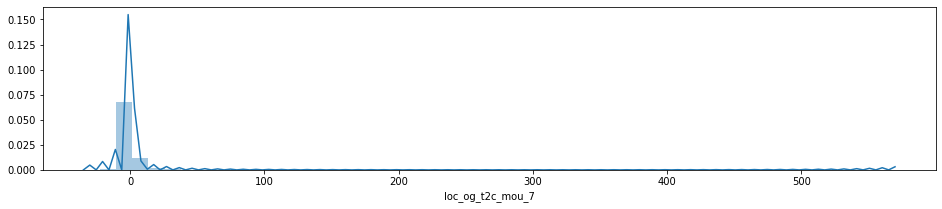

loc_og_t2c_mou_8


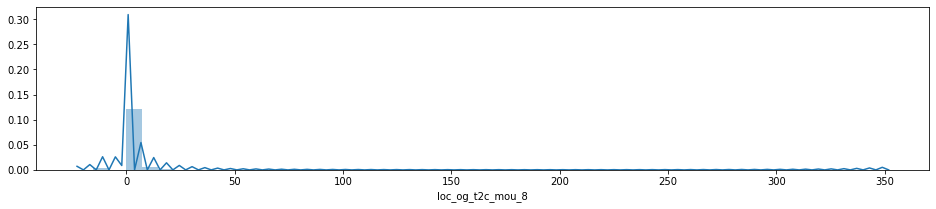

loc_og_mou_6


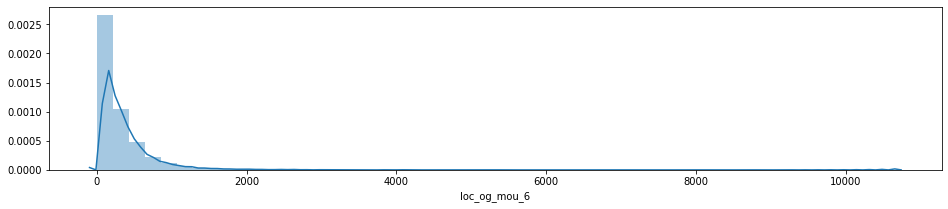

loc_og_mou_7


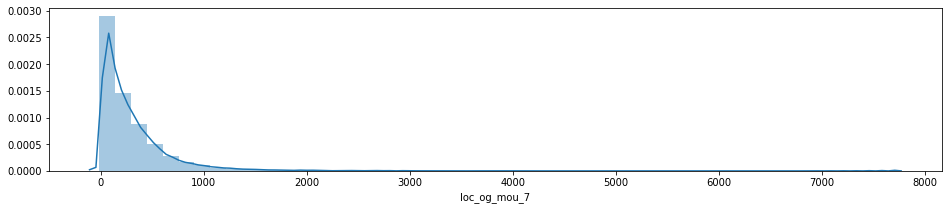

loc_og_mou_8


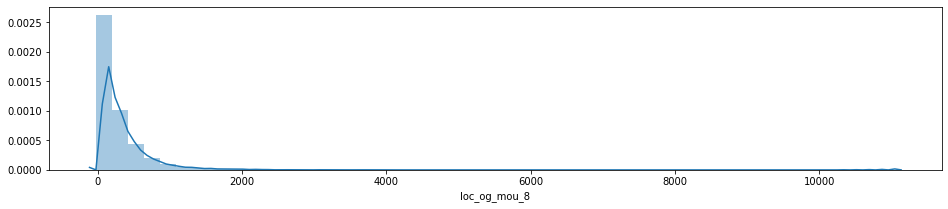

std_og_t2t_mou_6


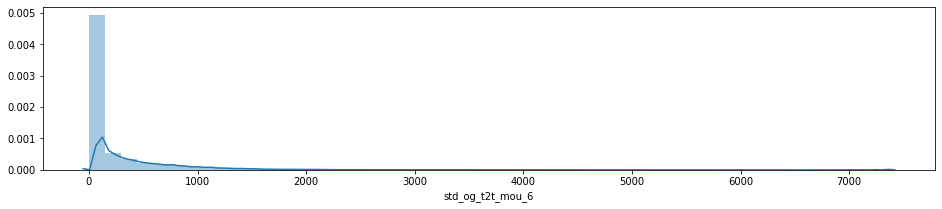

std_og_t2t_mou_7


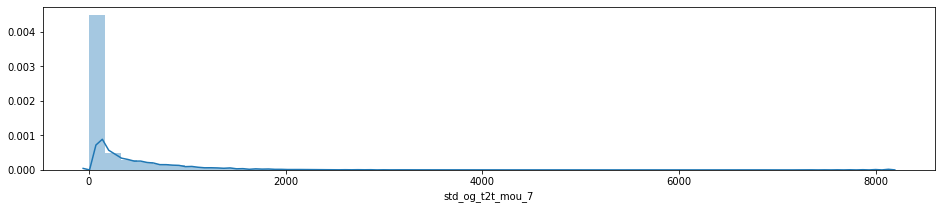

std_og_t2t_mou_8


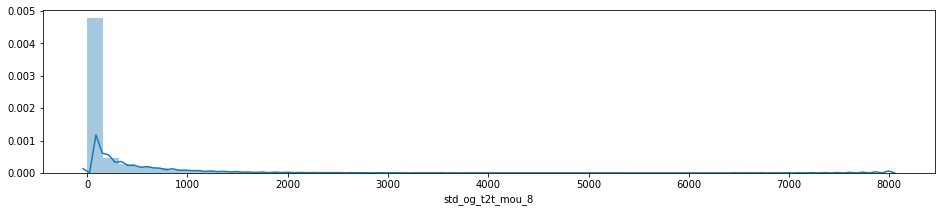

std_og_t2m_mou_6


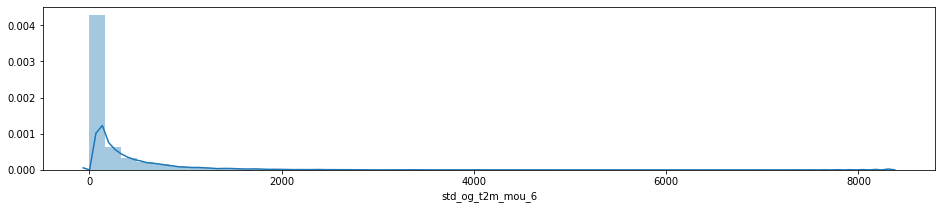

std_og_t2m_mou_7


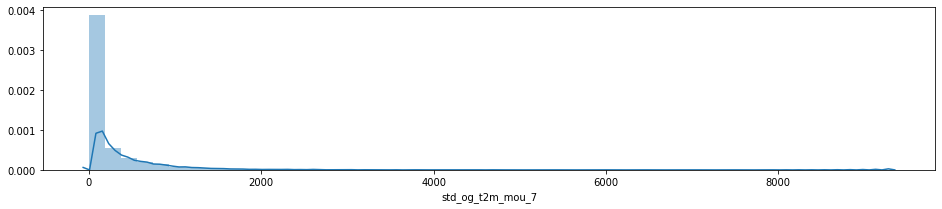

std_og_t2m_mou_8


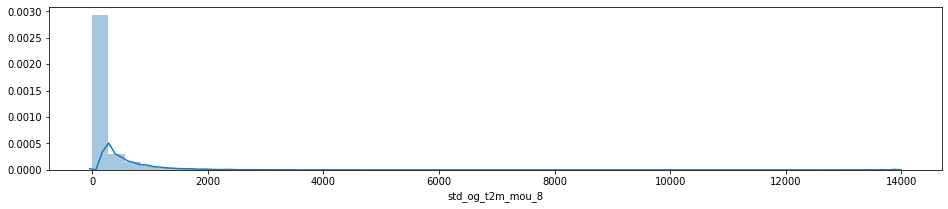

std_og_t2f_mou_6


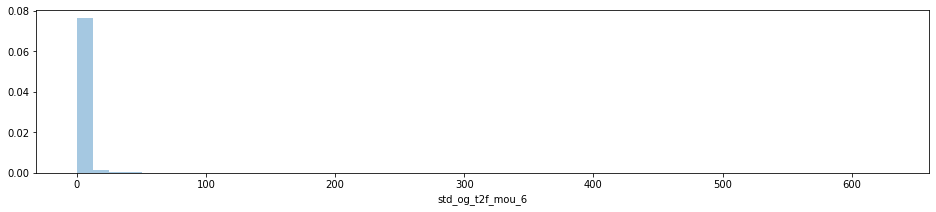

std_og_t2f_mou_7


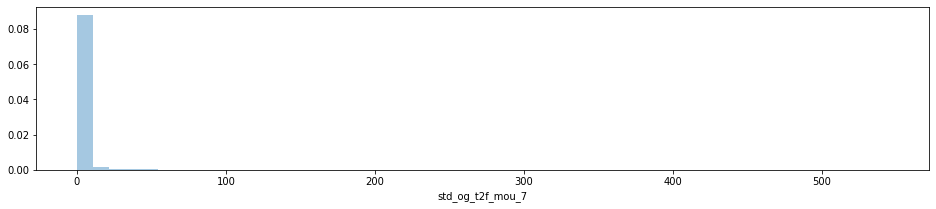

std_og_t2f_mou_8


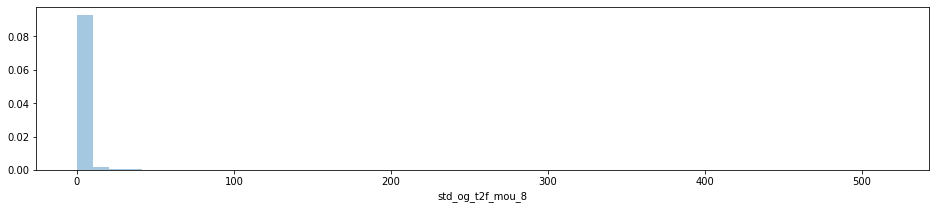

std_og_mou_6


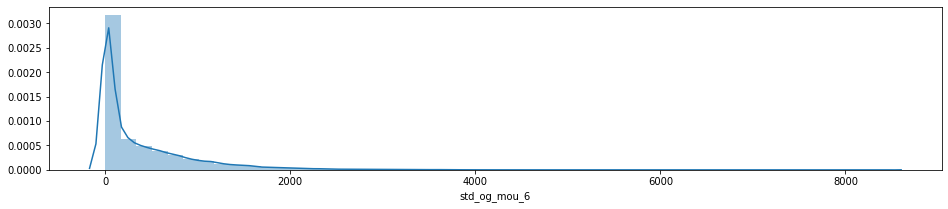

std_og_mou_7


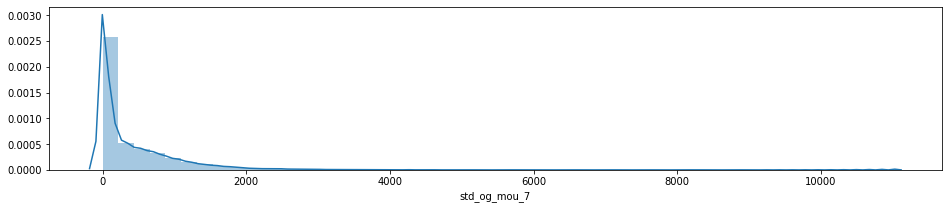

std_og_mou_8


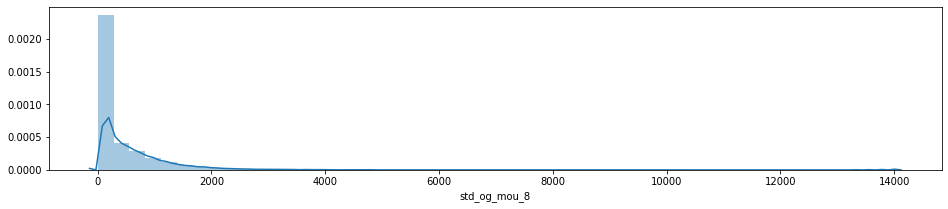

isd_og_mou_6


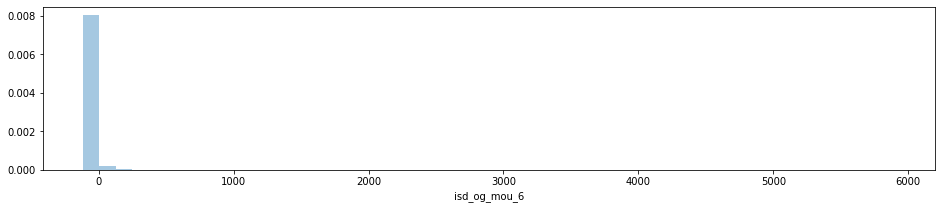

isd_og_mou_7


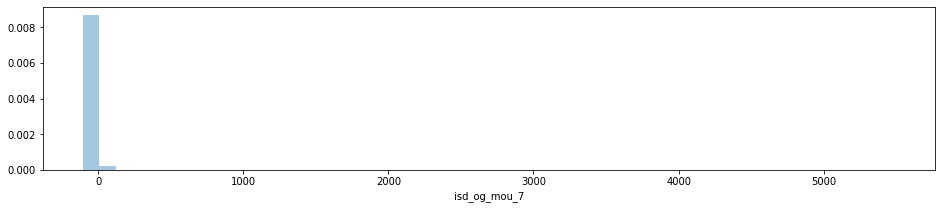

isd_og_mou_8


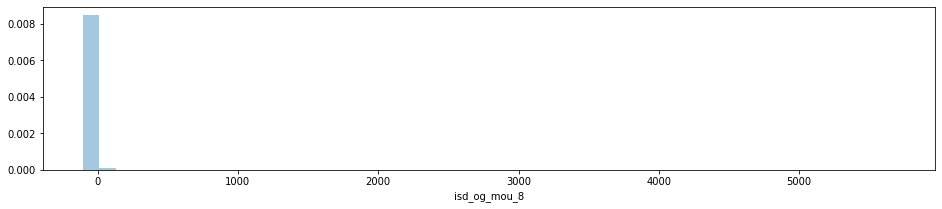

spl_og_mou_6


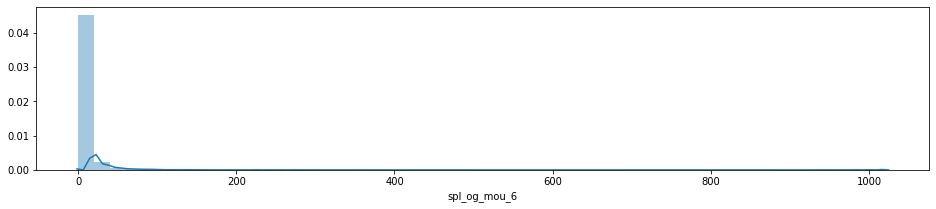

spl_og_mou_7


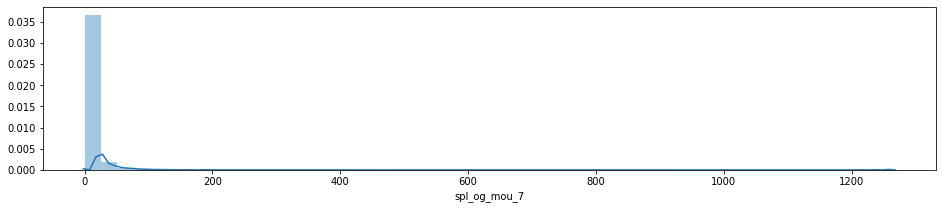

spl_og_mou_8


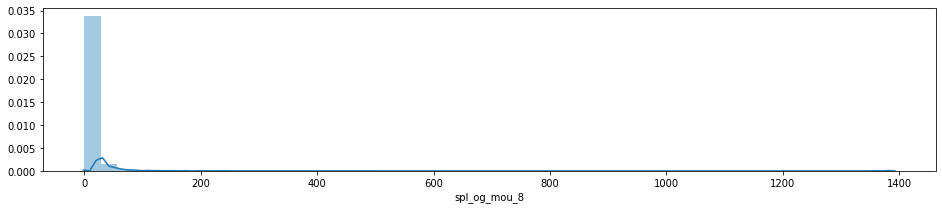

og_others_6


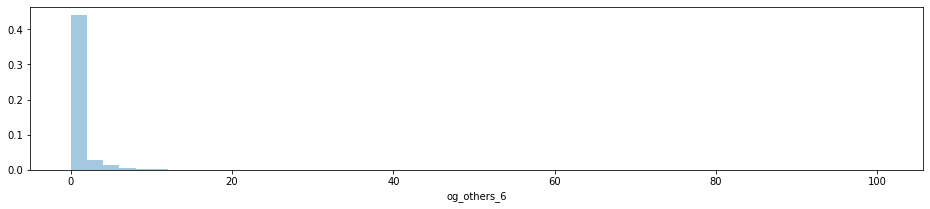

og_others_7


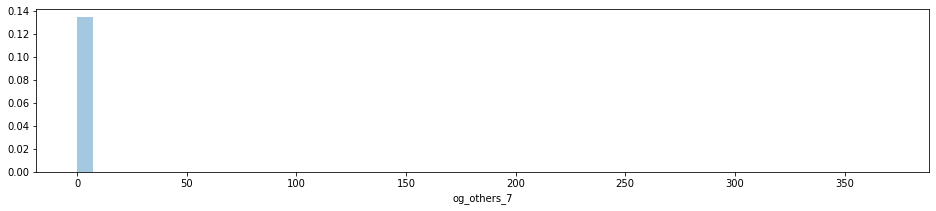

og_others_8


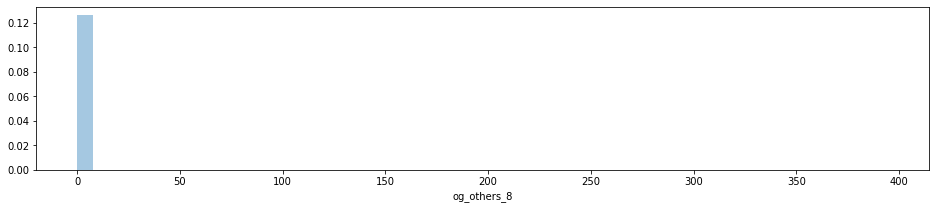

total_og_mou_6


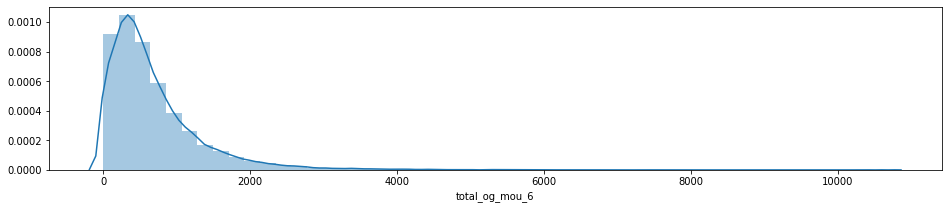

total_og_mou_7


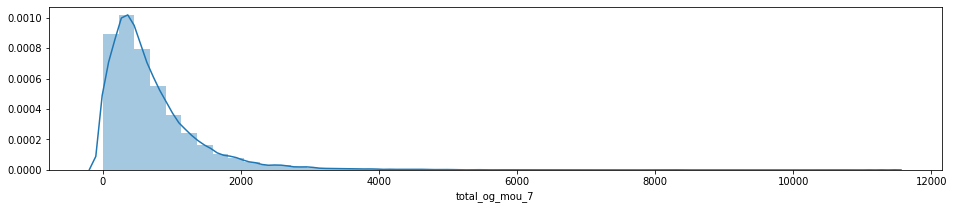

total_og_mou_8


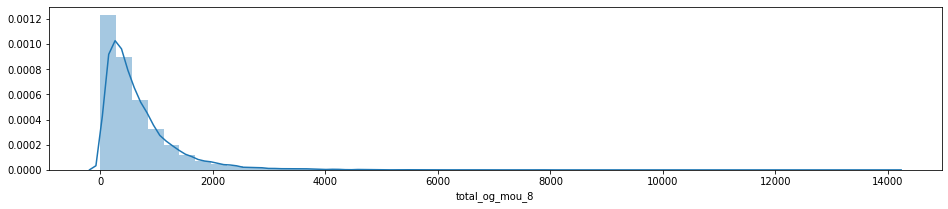

loc_ic_t2t_mou_6


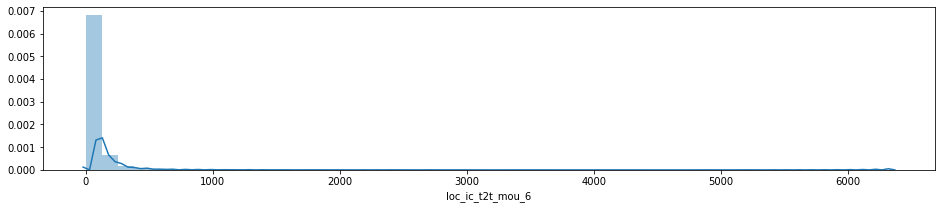

loc_ic_t2t_mou_7


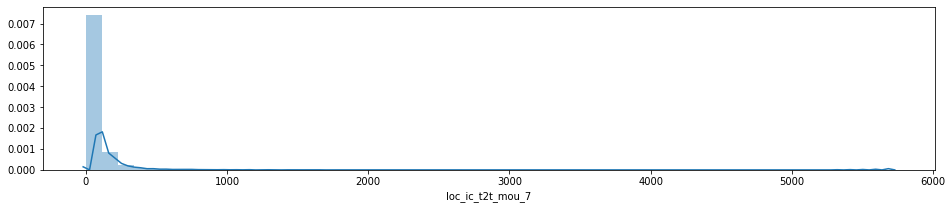

loc_ic_t2t_mou_8


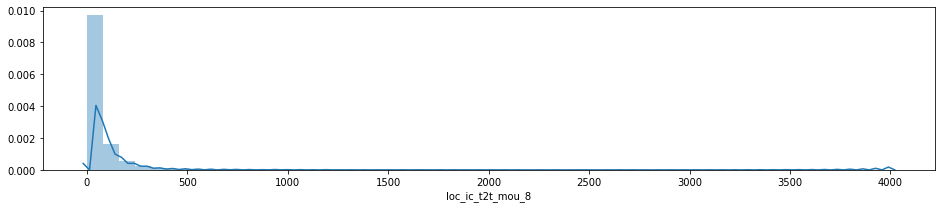

loc_ic_t2m_mou_6


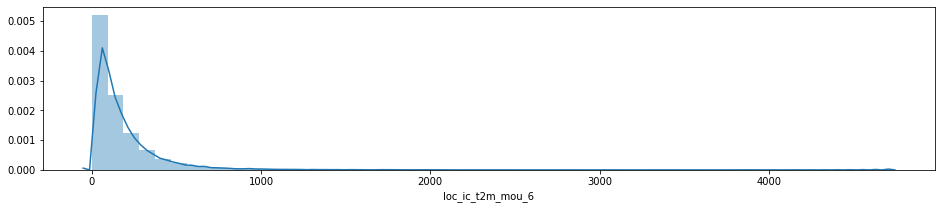

loc_ic_t2m_mou_7


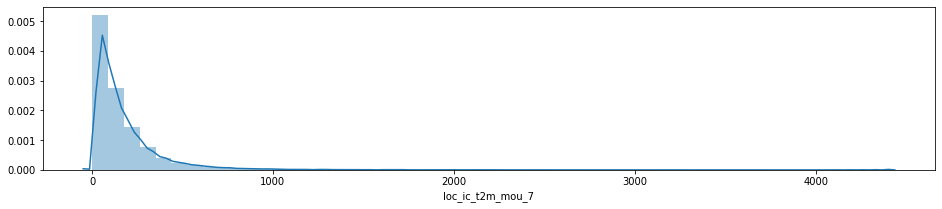

loc_ic_t2m_mou_8


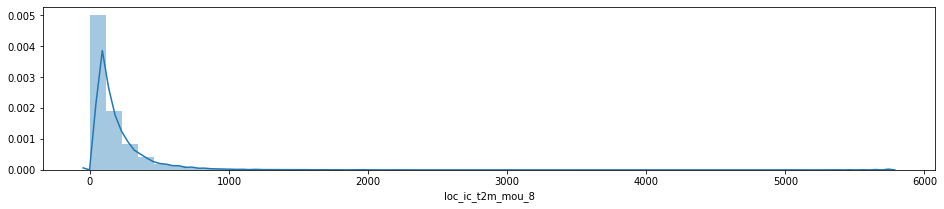

loc_ic_t2f_mou_6


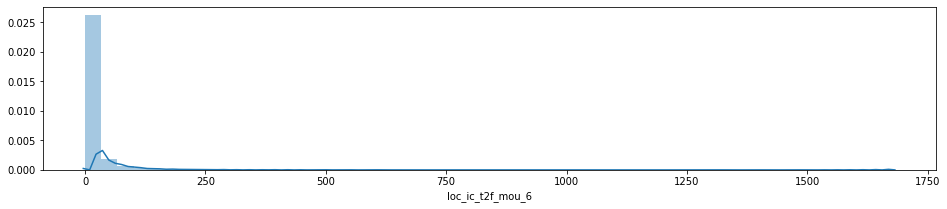

loc_ic_t2f_mou_7


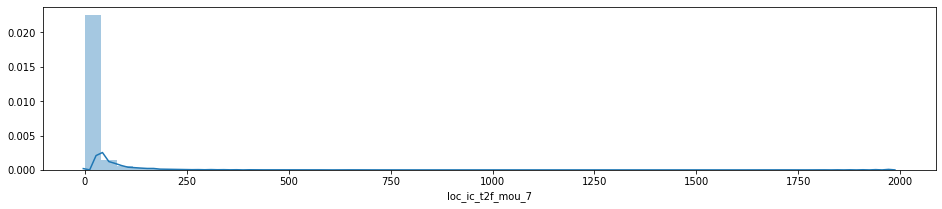

loc_ic_t2f_mou_8


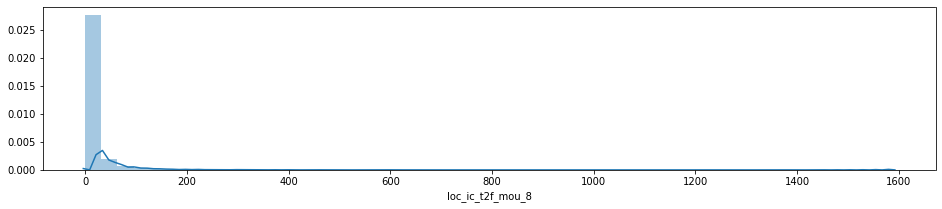

loc_ic_mou_6


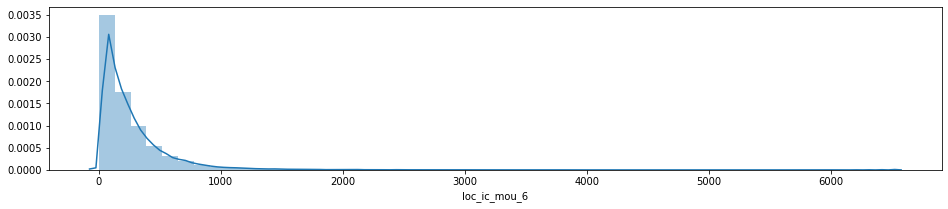

loc_ic_mou_7


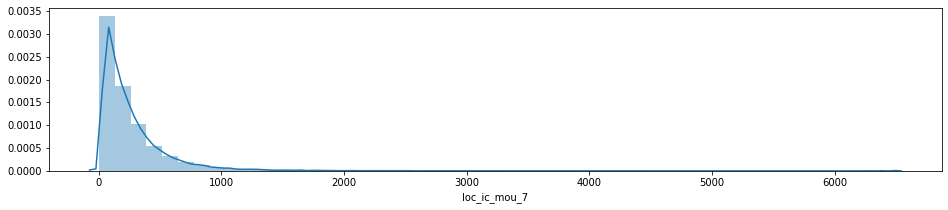

loc_ic_mou_8


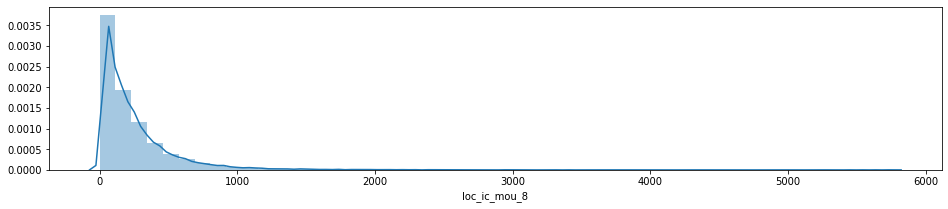

std_ic_t2t_mou_6


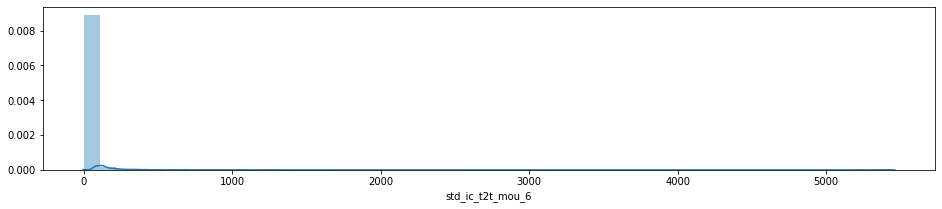

std_ic_t2t_mou_7


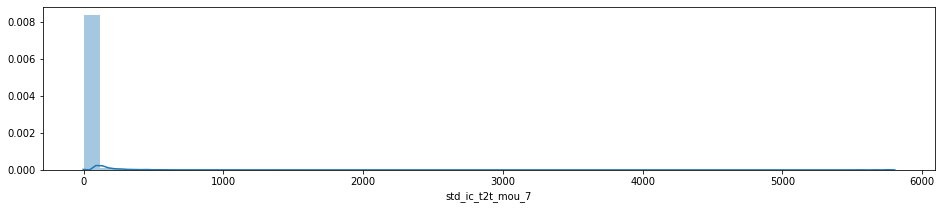

std_ic_t2t_mou_8


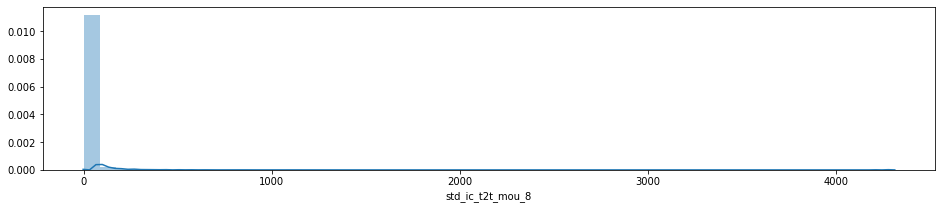

std_ic_t2m_mou_6


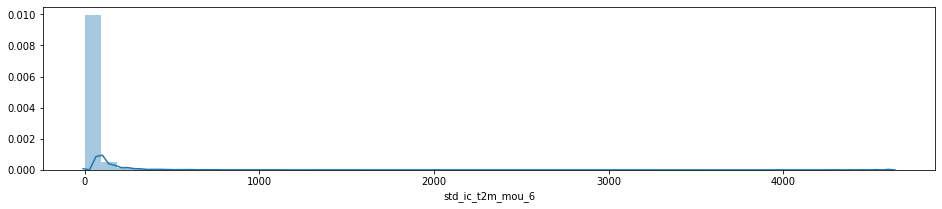

std_ic_t2m_mou_7


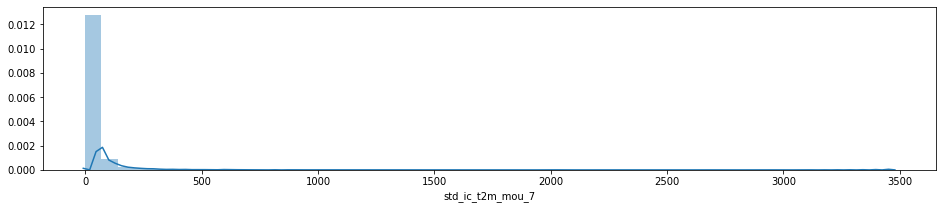

std_ic_t2m_mou_8


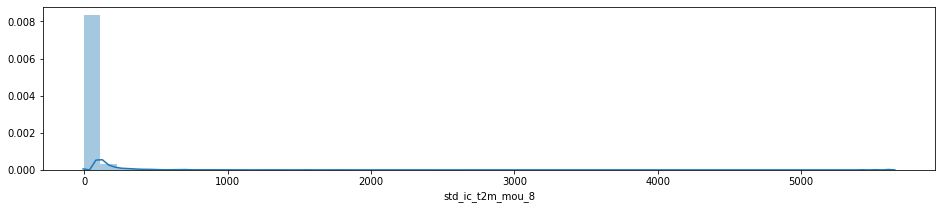

std_ic_t2f_mou_6


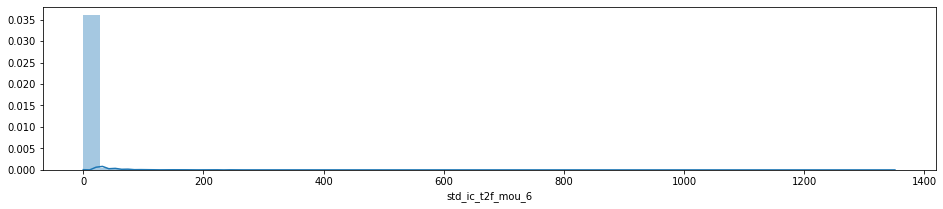

std_ic_t2f_mou_7


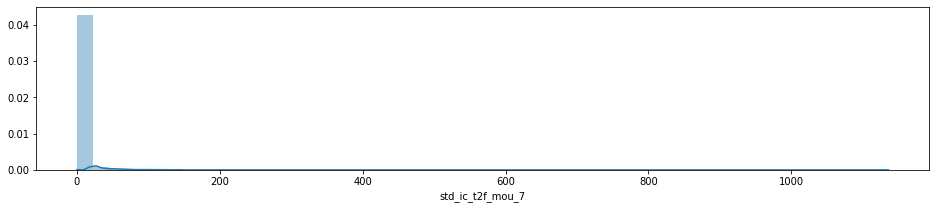

std_ic_t2f_mou_8


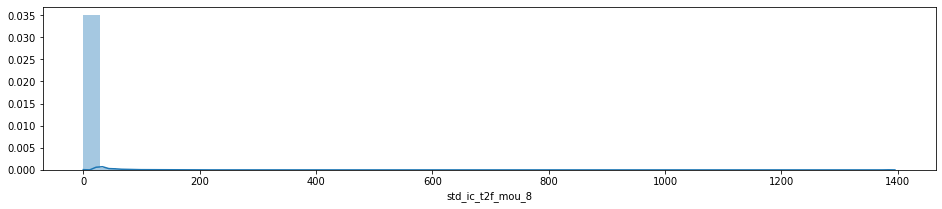

std_ic_mou_6


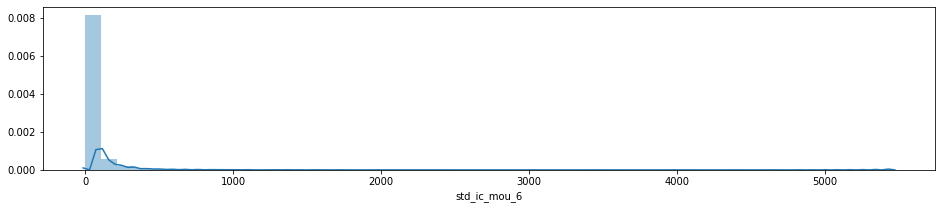

std_ic_mou_7


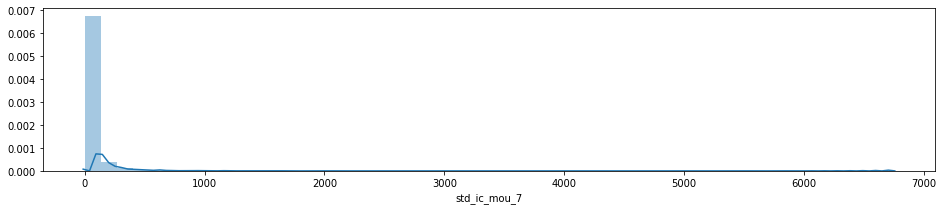

std_ic_mou_8


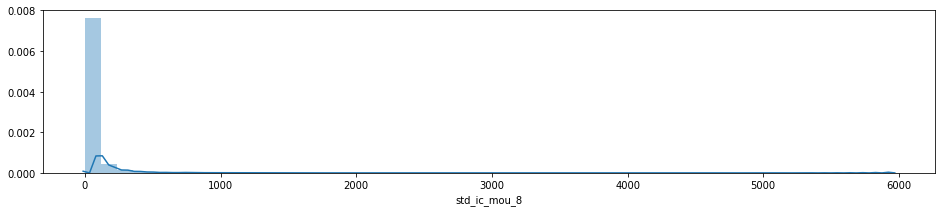

total_ic_mou_6


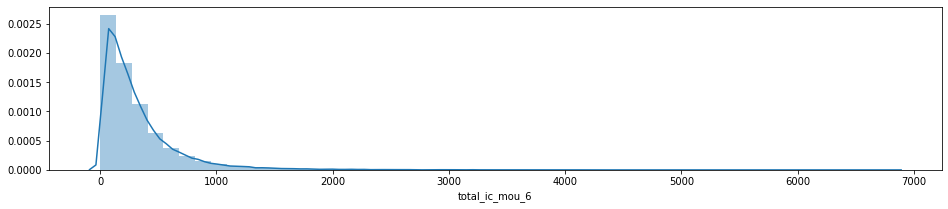

total_ic_mou_7


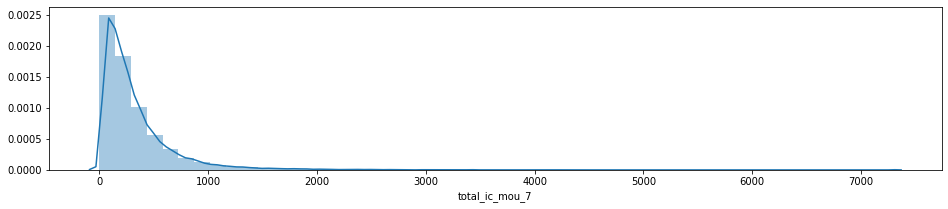

total_ic_mou_8


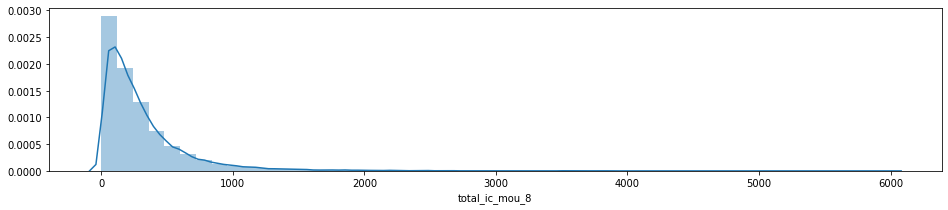

spl_ic_mou_6


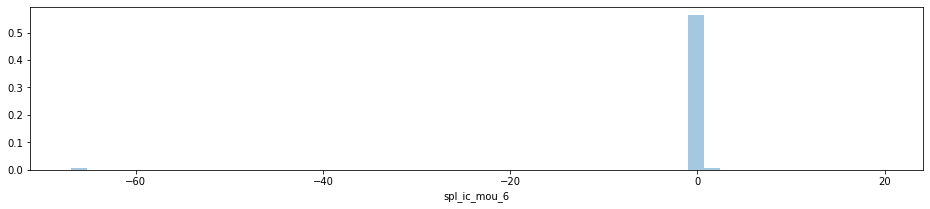

spl_ic_mou_7


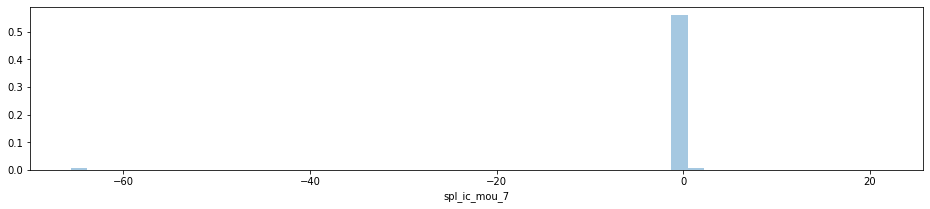

spl_ic_mou_8


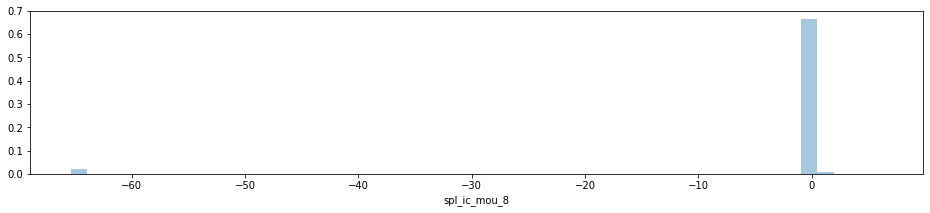

isd_ic_mou_6


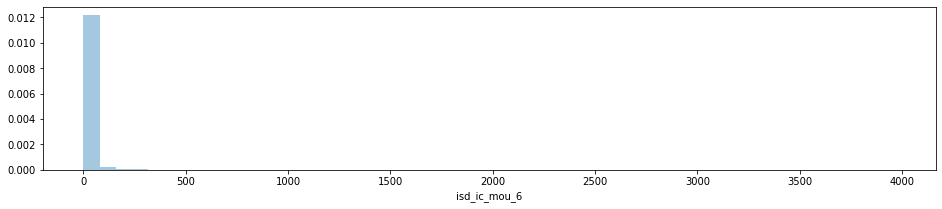

isd_ic_mou_7


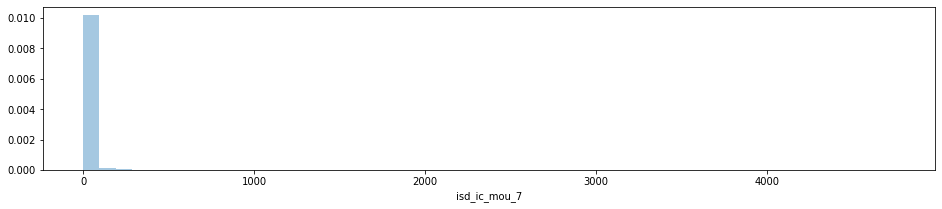

isd_ic_mou_8


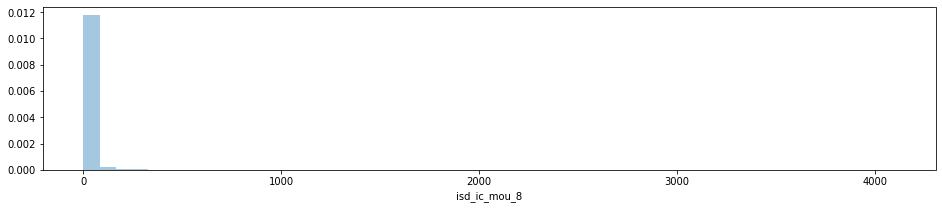

ic_others_6


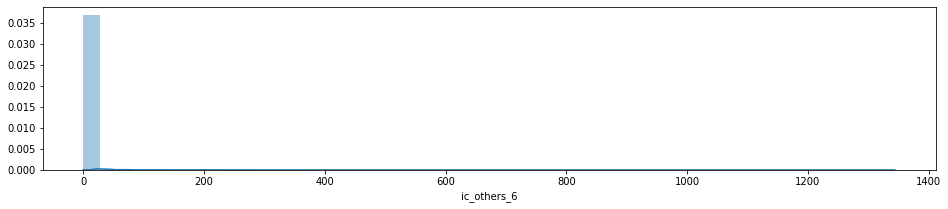

ic_others_7


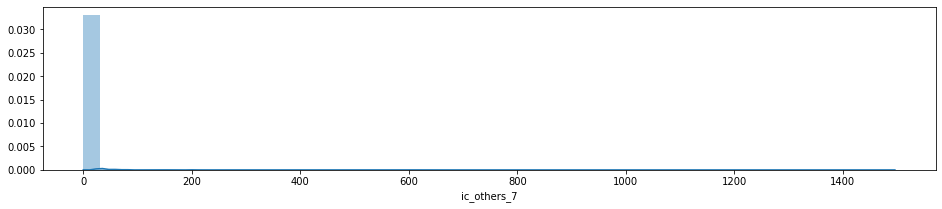

ic_others_8


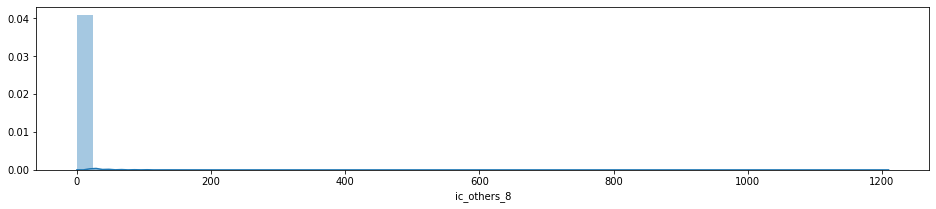

total_rech_num_6


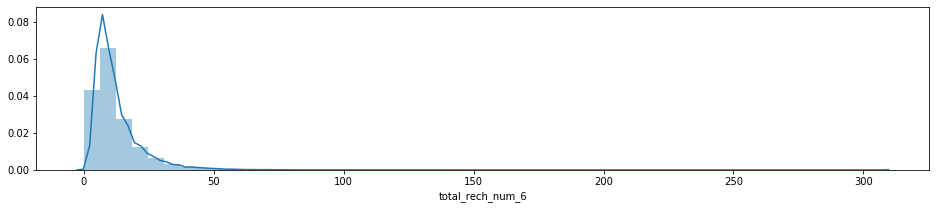

total_rech_num_7


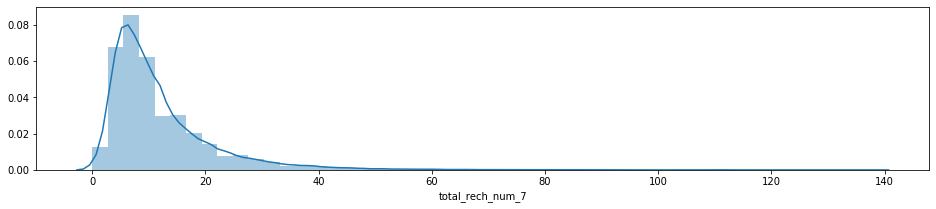

total_rech_num_8


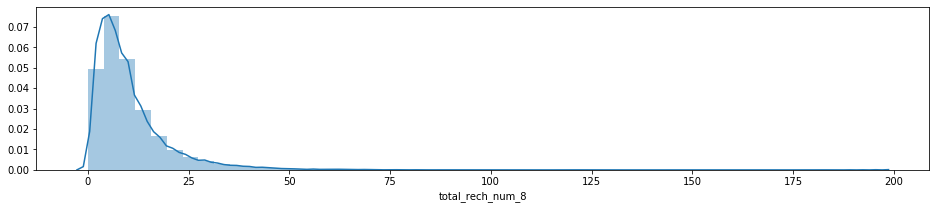

total_rech_amt_6


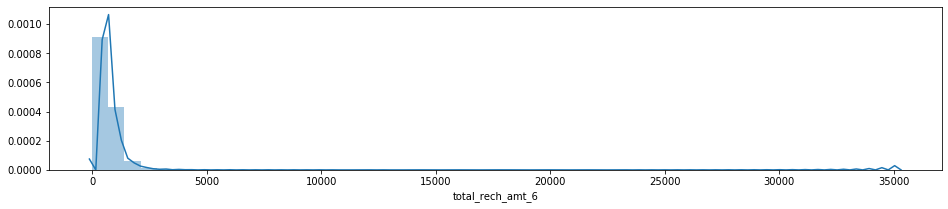

total_rech_amt_7


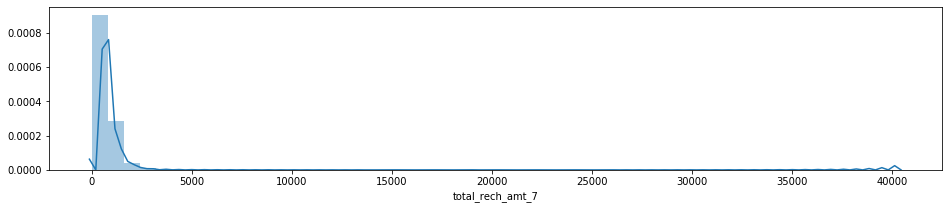

total_rech_amt_8


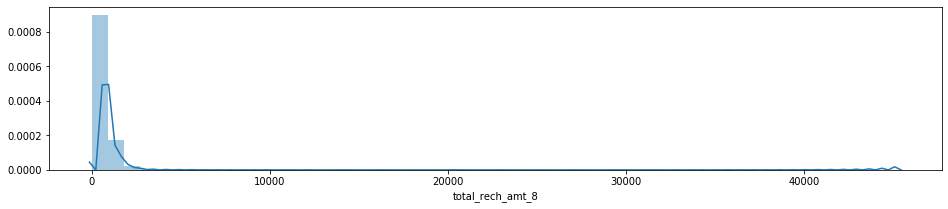

max_rech_amt_6


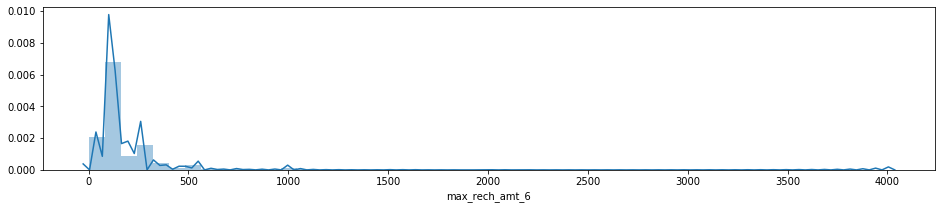

max_rech_amt_7


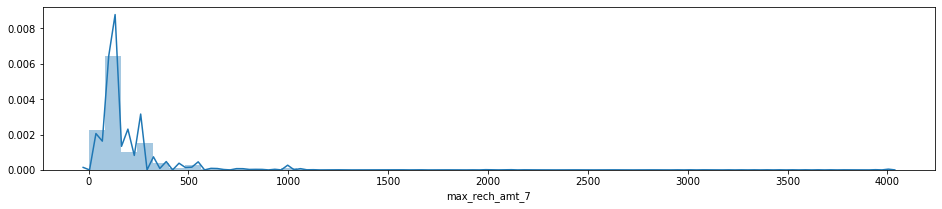

max_rech_amt_8


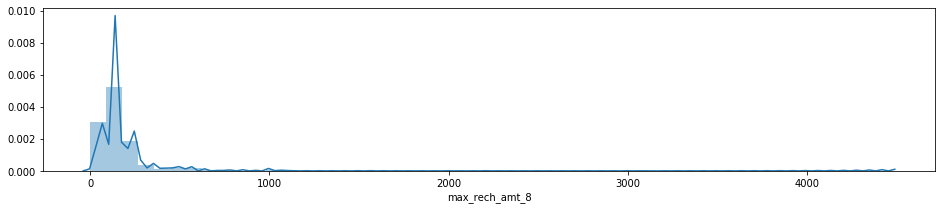

date_of_last_rech_6


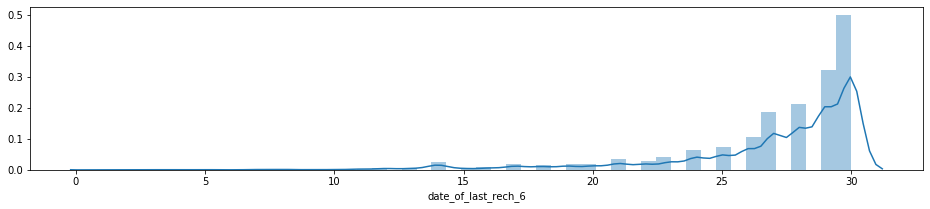

date_of_last_rech_7


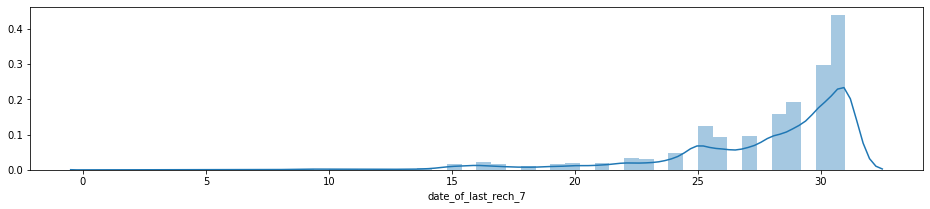

date_of_last_rech_8


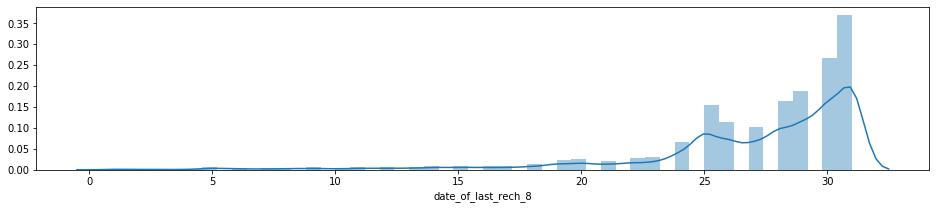

last_day_rch_amt_6


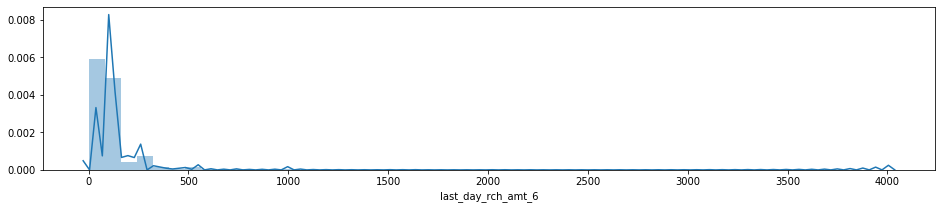

last_day_rch_amt_7


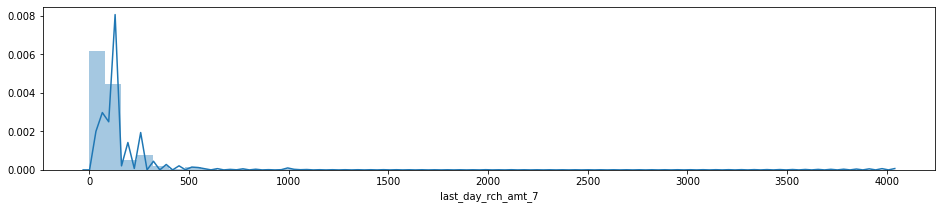

last_day_rch_amt_8


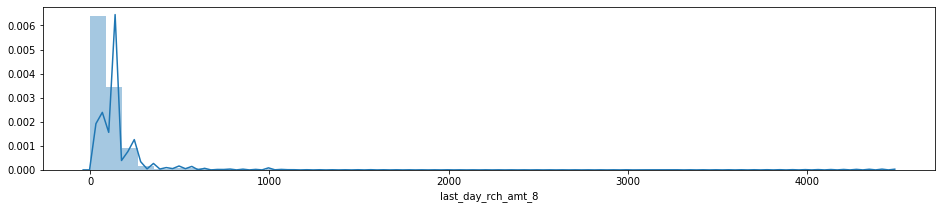

vol_2g_mb_6


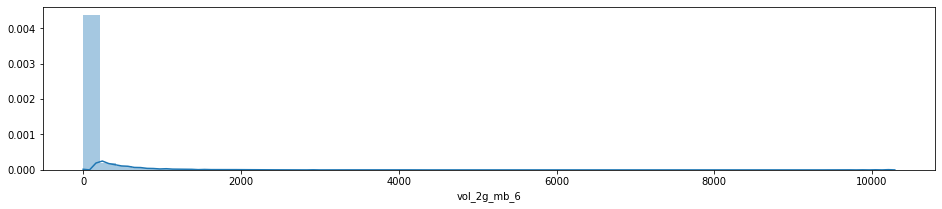

vol_2g_mb_7


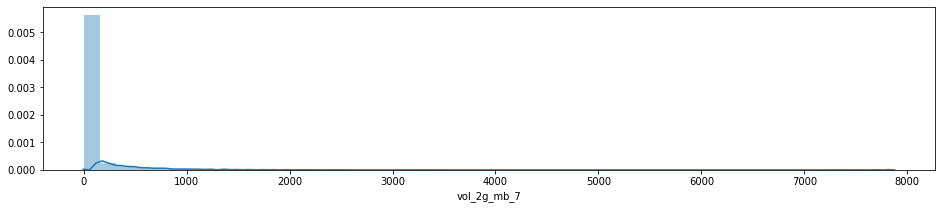

vol_2g_mb_8


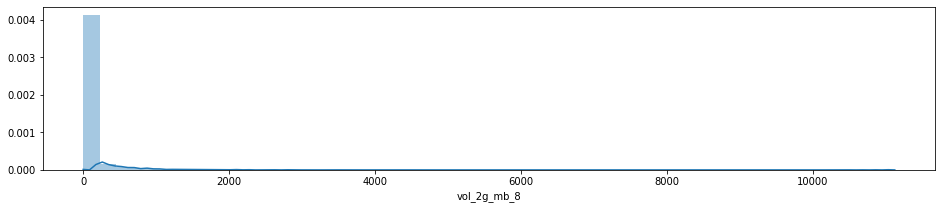

vol_3g_mb_6


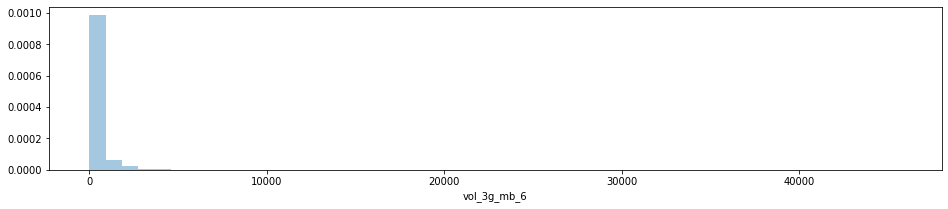

vol_3g_mb_7


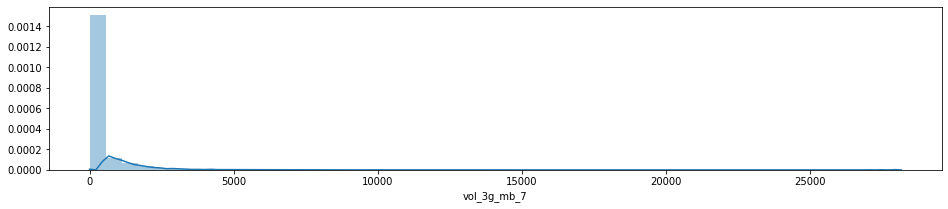

vol_3g_mb_8


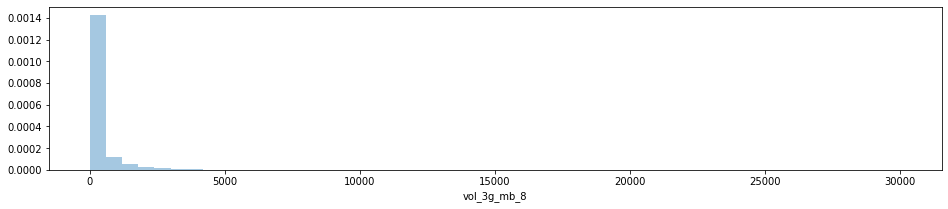

monthly_2g_6


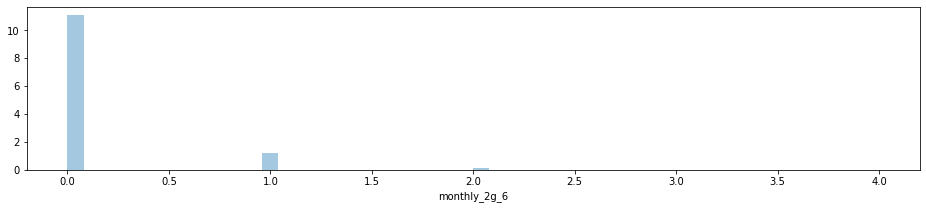

monthly_2g_7


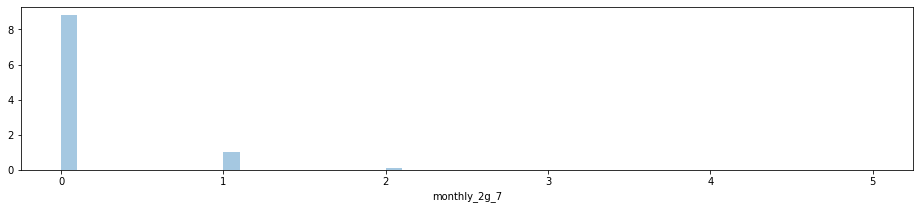

monthly_2g_8


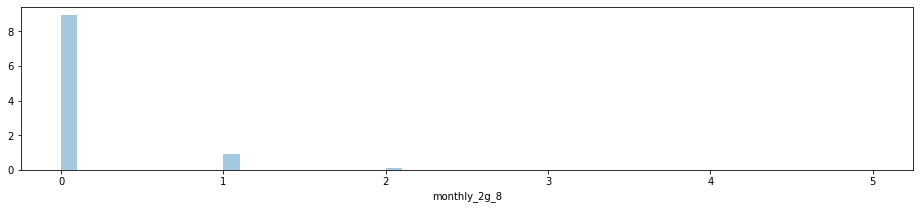

sachet_2g_6


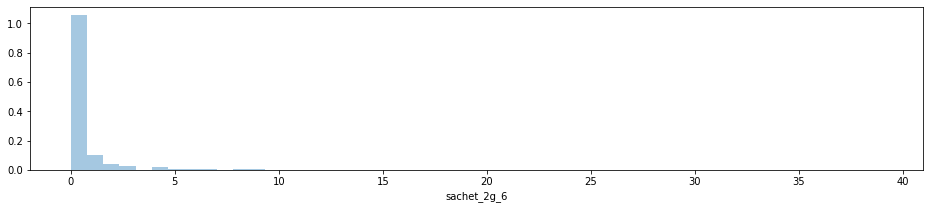

sachet_2g_7


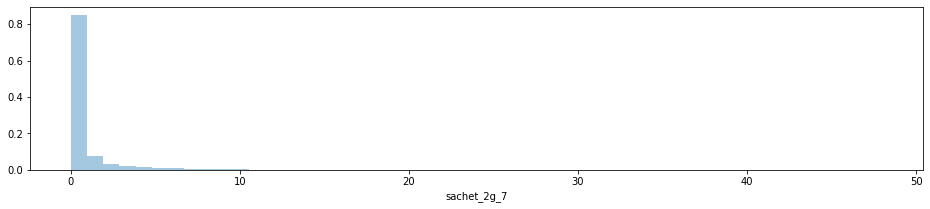

sachet_2g_8


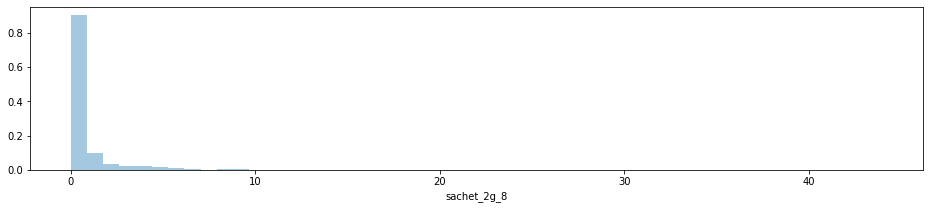

monthly_3g_6


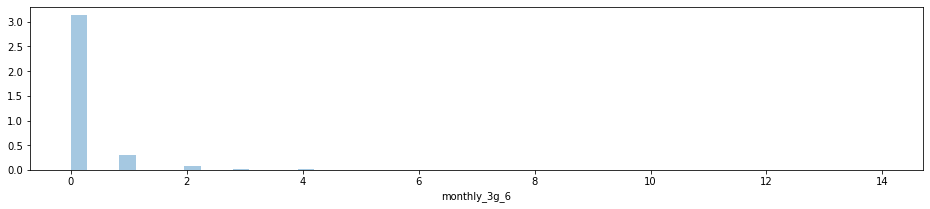

monthly_3g_7


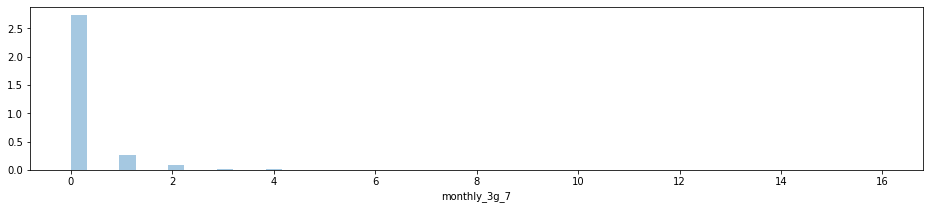

monthly_3g_8


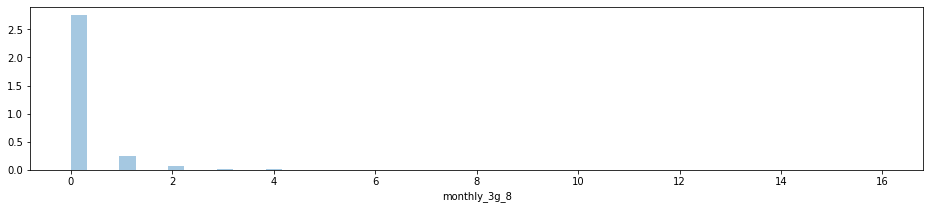

sachet_3g_6


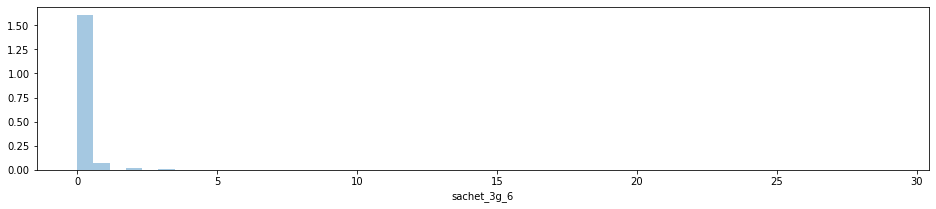

sachet_3g_7


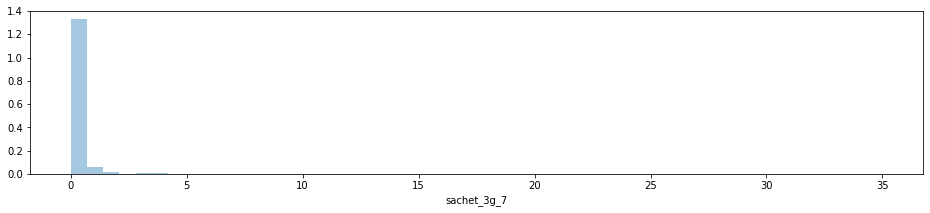

sachet_3g_8


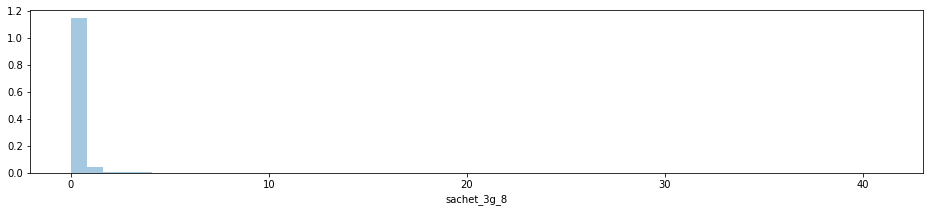

aon


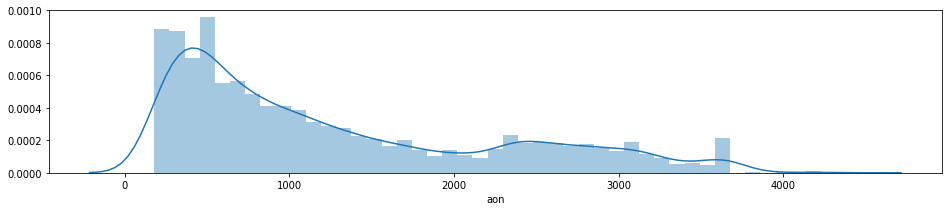

aug_vbc_3g


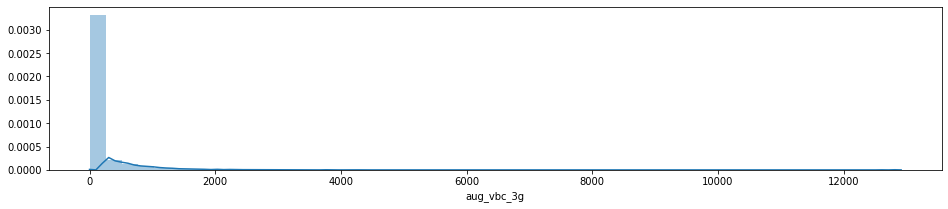

jul_vbc_3g


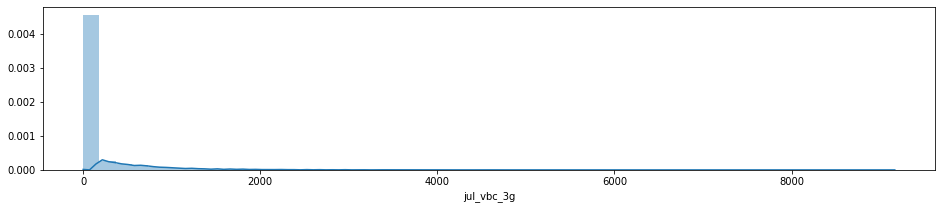

jun_vbc_3g


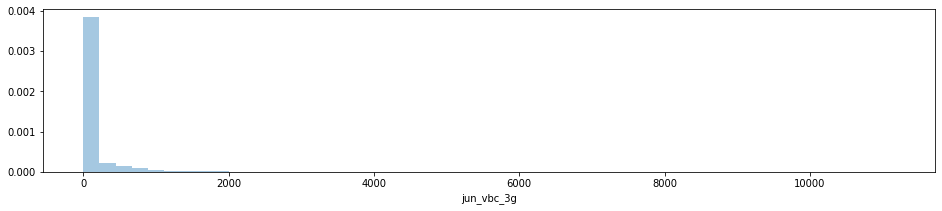

sep_vbc_3g


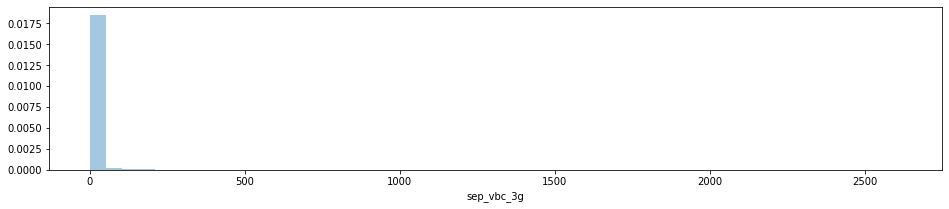

churn_data


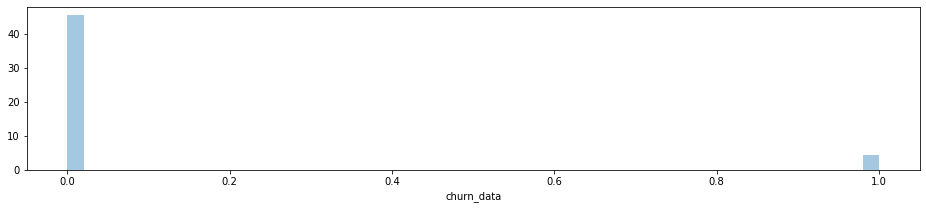

arpu_ratio


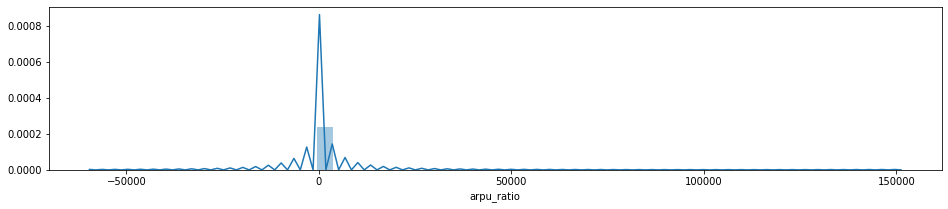

call_centre_ratio


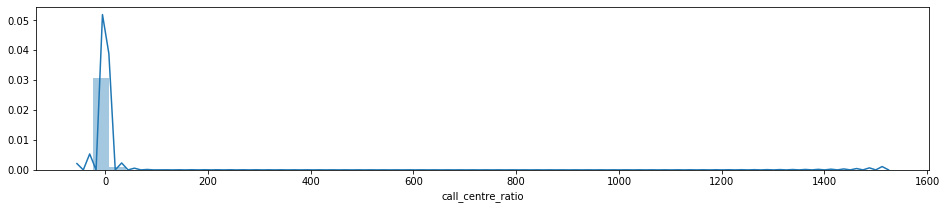

network_usage_diff


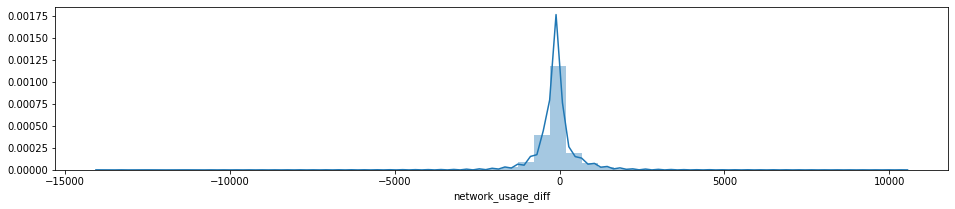

network_usage_diff_good


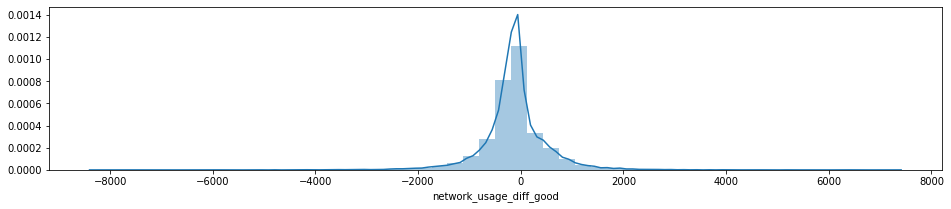

2g_usage_ratio


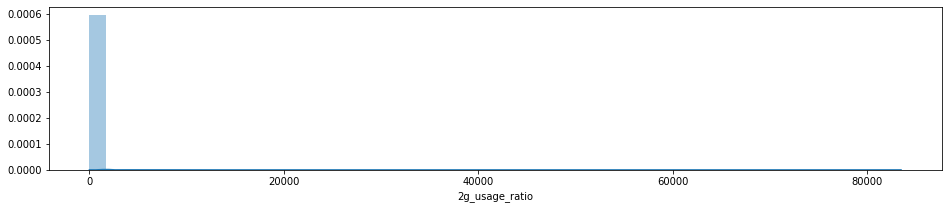

3g_usage_ratio


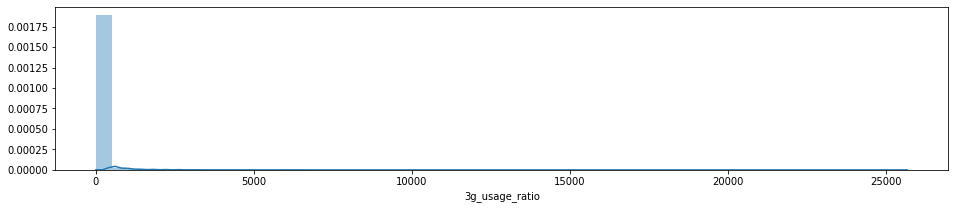

og_ratio


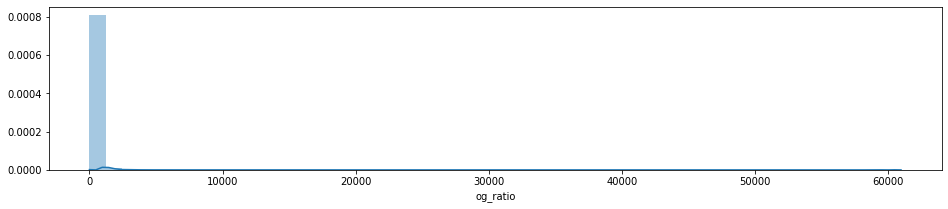

ic_ratio


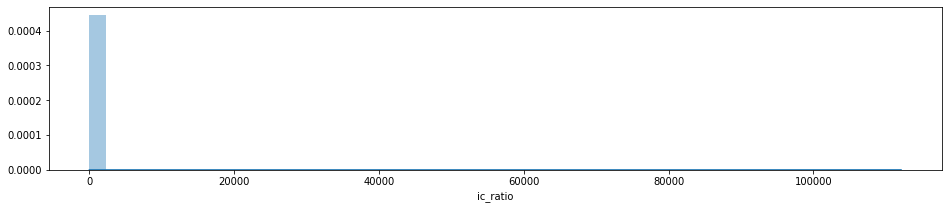

vbc_difference


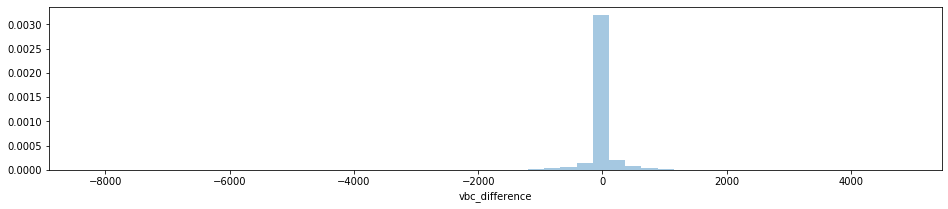

In [54]:
# Univariate analysis on all column
for columns in telecom_churn_df_high.columns:
    plt.figure(figsize=(16,3))
    column = telecom_churn_df_high[columns]
    print(columns)
    sns.distplot(column)
    plt.show()

# Bivariate analysis

In [55]:
#Older customer are more likely to continue
telecom_churn_df_high['binned_aon'] = pd.qcut(telecom_churn_df_high['aon'], 10)
(round(100*(telecom_churn_df_high.groupby(['binned_aon','churn_data']).count()/telecom_churn_df_high.groupby(['binned_aon']).count()).mobile_number),2)

(binned_aon        churn_data
 (179.999, 294.0]  0            85.000000
                   1            15.000000
 (294.0, 418.0]    0            87.000000
                   1            13.000000
 (418.0, 522.0]    0            90.000000
                   1            10.000000
 (522.0, 703.0]    0            89.000000
                   1            11.000000
 (703.0, 914.0]    0            88.000000
                   1            12.000000
 (914.0, 1183.0]   0            91.000000
                   1            9.000000 
 (1183.0, 1590.0]  0            94.000000
                   1            6.000000 
 (1590.0, 2325.0]  0            95.000000
                   1            5.000000 
 (2325.0, 2846.0]  0            96.000000
                   1            4.000000 
 (2846.0, 4321.0]  0            97.000000
                   1            3.000000 
 Name: mobile_number, dtype: float64,
 2)

In [56]:
telecom_churn_df_high.drop(['binned_aon'], axis=1, inplace=True)

In [57]:
# customers having low arpu in action phase as compared to good phase is likely to churn
telecom_churn_df_high['binned_arpu_ratio'] = pd.qcut(telecom_churn_df_high['arpu_ratio'], 10)
(round(100*(telecom_churn_df_high.groupby(['binned_arpu_ratio','churn_data']).count()/telecom_churn_df_high.groupby(['binned_arpu_ratio']).count()).mobile_number),2)

(binned_arpu_ratio             churn_data
 (-59575.700999999994, 0.661]  0            95.000000
                               1            5.000000 
 (0.661, 0.79]                 0            97.000000
                               1            3.000000 
 (0.79, 0.894]                 0            97.000000
                               1            3.000000 
 (0.894, 0.991]                0            98.000000
                               1            2.000000 
 (0.991, 1.098]                0            97.000000
                               1            3.000000 
 (1.098, 1.229]                0            97.000000
                               1            3.000000 
 (1.229, 1.415]                0            96.000000
                               1            4.000000 
 (1.415, 1.786]                0            95.000000
                               1            5.000000 
 (1.786, 3.391]                0            87.000000
                               1        

In [58]:
telecom_churn_df_high.drop(['binned_arpu_ratio'], axis=1, inplace=True)

In [59]:
# customers not using outgoing calls for september are likely to churn
telecom_churn_df_high['binned_total_og_mou_8'] = pd.qcut(telecom_churn_df_high['total_og_mou_8'], 10)
(round(100*(telecom_churn_df_high.groupby(['binned_total_og_mou_8','churn_data']).count()/telecom_churn_df_high.groupby(['binned_total_og_mou_8']).count()).mobile_number),2)

(binned_total_og_mou_8  churn_data
 (-0.001, 19.41]        0            51.000000
                        1            49.000000
 (19.41, 138.06]        0            91.000000
                        1            9.000000 
 (138.06, 235.91]       0            94.000000
                        1            6.000000 
 (235.91, 331.76]       0            96.000000
                        1            4.000000 
 (331.76, 435.33]       0            96.000000
                        1            4.000000 
 (435.33, 563.51]       0            97.000000
                        1            3.000000 
 (563.51, 732.94]       0            98.000000
                        1            2.000000 
 (732.94, 960.03]       0            97.000000
                        1            3.000000 
 (960.03, 1393.51]      0            97.000000
                        1            3.000000 
 (1393.51, 14043.06]    0            97.000000
                        1            3.000000 
 Name: mobile_number, dty

In [60]:
telecom_churn_df_high.drop(['binned_total_og_mou_8'], axis=1, inplace=True)

In [61]:
# customers having low arpu in action period is likely to churn
telecom_churn_df_high['binned_arpu_8'] = pd.qcut(telecom_churn_df_high['arpu_8'], 10)
(round(100*(telecom_churn_df_high.groupby(['binned_arpu_8','churn_data']).count()/telecom_churn_df_high.groupby(['binned_arpu_8']).count()).mobile_number),2)

(binned_arpu_8         churn_data
 (-945.809, 134.17]    0            53.000000
                       1            47.000000
 (134.17, 252.3]       0            90.000000
                       1            10.000000
 (252.3, 324.913]      0            94.000000
                       1            6.000000 
 (324.913, 387.465]    0            96.000000
                       1            4.000000 
 (387.465, 452.091]    0            97.000000
                       1            3.000000 
 (452.091, 526.063]    0            97.000000
                       1            3.000000 
 (526.063, 614.013]    0            97.000000
                       1            3.000000 
 (614.013, 744.166]    0            97.000000
                       1            3.000000 
 (744.166, 985.202]    0            97.000000
                       1            3.000000 
 (985.202, 33543.624]  0            96.000000
                       1            4.000000 
 Name: mobile_number, dtype: float64,
 2)

In [62]:
telecom_churn_df_high.drop(['binned_arpu_8'], axis=1, inplace=True)

In [63]:
# customers having low arpu in action period is likely to churn
telecom_churn_df_high['binned_onnet_mou_8'] = pd.qcut(telecom_churn_df_high['onnet_mou_8'], 10)
(round(100*(telecom_churn_df_high.groupby(['binned_onnet_mou_8','churn_data']).count()/telecom_churn_df_high.groupby(['binned_onnet_mou_8']).count()).mobile_number),2)

(binned_onnet_mou_8          churn_data
 (-505.54999999999995, 2.9]  0            62.000000
                             1            38.000000
 (2.9, 17.98]                0            89.000000
                             1            11.000000
 (17.98, 38.24]              0            92.000000
                             1            8.000000 
 (38.24, 63.58]              0            95.000000
                             1            5.000000 
 (63.58, 99.44]              0            96.000000
                             1            4.000000 
 (99.44, 150.38]             0            96.000000
                             1            4.000000 
 (150.38, 234.51]            0            96.000000
                             1            4.000000 
 (234.51, 389.31]            0            96.000000
                             1            4.000000 
 (389.31, 723.61]            0            96.000000
                             1            4.000000 
 (723.61, 10752.56]     

In [64]:
telecom_churn_df_high.drop(['binned_onnet_mou_8'], axis=1, inplace=True)

In [65]:
# customers having low arpu in action period is likely to churn
telecom_churn_df_high['binned_offnet_mou_8'] = pd.qcut(telecom_churn_df_high['offnet_mou_8'], 10)
(round(100*(telecom_churn_df_high.groupby(['binned_offnet_mou_8','churn_data']).count()/telecom_churn_df_high.groupby(['binned_offnet_mou_8']).count()).mobile_number),2)

(binned_offnet_mou_8  churn_data
 (-0.001, 35.08]      0            78.000000
                      1            22.000000
 (35.08, 85.63]       0            91.000000
                      1            9.000000 
 (85.63, 138.88]      0            94.000000
                      1            6.000000 
 (138.88, 177.36]     0            72.000000
                      1            28.000000
 (177.36, 240.94]     0            95.000000
                      1            5.000000 
 (240.94, 314.71]     0            97.000000
                      1            3.000000 
 (314.71, 415.84]     0            97.000000
                      1            3.000000 
 (415.84, 564.58]     0            97.000000
                      1            3.000000 
 (564.58, 853.79]     0            97.000000
                      1            3.000000 
 (853.79, 14007.34]   0            97.000000
                      1            3.000000 
 Name: mobile_number, dtype: float64,
 2)

In [66]:
telecom_churn_df_high.drop(['binned_offnet_mou_8'], axis=1, inplace=True)

# Outlier Treatment

There must be data which are not significant in predicting the Churn customers in every column and presence of this data would give biased results. Hence we can do outlier treatement to remove such data

It is done using 3 sigma technique

In [67]:
pre_treatment = telecom_churn_df_high.index.size

In [68]:
# Remove 0.3 percent outliers from data set 
for columns in telecom_churn_df_high.columns:
    column = telecom_churn_df_high[columns]
    upper = column.mean() + 3*column.std()
    lower = column.mean() - 3*column.std()
    outliers = pd.Series([x for x in column if (x < lower) or (x > upper)])
    out_percent = (outliers.size/column.size) * 100
    if out_percent <= 0.3:
        print(out_percent)
        telecom_churn_df_high = telecom_churn_df_high[(telecom_churn_df_high[columns] >= lower) & (telecom_churn_df_high[columns] <= upper)]
    

0.0
0.29322581720035984
0.08354777261638205
0.12709880259549133
0.09377093101138648
0.19777420219898095
0.2854935679978504
0.13136620856911885
0.03372795035245708


In [69]:
telecom_churn_df_high.shape

(29639, 139)

In [70]:
# % data retained after treatment
(telecom_churn_df_high.index.size/pre_treatment) *100

98.76045450001666

### Standardizing data

- Converting data set into dependant and independant variables for building the models

In [71]:
X = telecom_churn_df_high.drop(['churn_data','mobile_number'],axis=1)

# Putting response variable to y
y = telecom_churn_df_high['churn_data']

y.head()

7     1
13    0
16    0
17    0
21    0
Name: churn_data, dtype: int64

### Splitting test/train data:
- We need to split the data into training and testing set. Models would be run on Training set and validated on testing data set later

In [72]:
columns_name = X.columns
[print(x) for x in columns_name]

arpu_6
arpu_7
arpu_8
onnet_mou_6
onnet_mou_7
onnet_mou_8
offnet_mou_6
offnet_mou_7
offnet_mou_8
roam_ic_mou_6
roam_ic_mou_7
roam_ic_mou_8
roam_og_mou_6
roam_og_mou_7
roam_og_mou_8
loc_og_t2t_mou_6
loc_og_t2t_mou_7
loc_og_t2t_mou_8
loc_og_t2m_mou_6
loc_og_t2m_mou_7
loc_og_t2m_mou_8
loc_og_t2f_mou_6
loc_og_t2f_mou_7
loc_og_t2f_mou_8
loc_og_t2c_mou_6
loc_og_t2c_mou_7
loc_og_t2c_mou_8
loc_og_mou_6
loc_og_mou_7
loc_og_mou_8
std_og_t2t_mou_6
std_og_t2t_mou_7
std_og_t2t_mou_8
std_og_t2m_mou_6
std_og_t2m_mou_7
std_og_t2m_mou_8
std_og_t2f_mou_6
std_og_t2f_mou_7
std_og_t2f_mou_8
std_og_mou_6
std_og_mou_7
std_og_mou_8
isd_og_mou_6
isd_og_mou_7
isd_og_mou_8
spl_og_mou_6
spl_og_mou_7
spl_og_mou_8
og_others_6
og_others_7
og_others_8
total_og_mou_6
total_og_mou_7
total_og_mou_8
loc_ic_t2t_mou_6
loc_ic_t2t_mou_7
loc_ic_t2t_mou_8
loc_ic_t2m_mou_6
loc_ic_t2m_mou_7
loc_ic_t2m_mou_8
loc_ic_t2f_mou_6
loc_ic_t2f_mou_7
loc_ic_t2f_mou_8
loc_ic_mou_6
loc_ic_mou_7
loc_ic_mou_8
std_ic_t2t_mou_6
std_ic_t2t_mou_7


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [73]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size=0.3,random_state=100) 

### Balancing data:
- There will be imbalanced data present, which would give wrong results. We need to do resampling by SMOTE sampling

In [74]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE 
X_train, y_train = SMOTE().fit_resample(X_train, y_train)
y_train =pd.Series(y_train)

Using TensorFlow backend.


### Scaling

In [75]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
X_train = pd.DataFrame(pt.fit_transform(X_train))
X_test = pd.DataFrame(pt.transform(X_test))
X_train.columns=columns_name
X_test.columns=columns_name

In [76]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import GridSearchCV

### Using LassoCV to get the best indicators of churn

In [77]:
reg = LassoCV()
reg.fit(X_train, y_train)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X_train, y_train))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.000313
Best score using built-in LassoCV: 0.652375


In [78]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 132 variables and eliminated the other 5 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

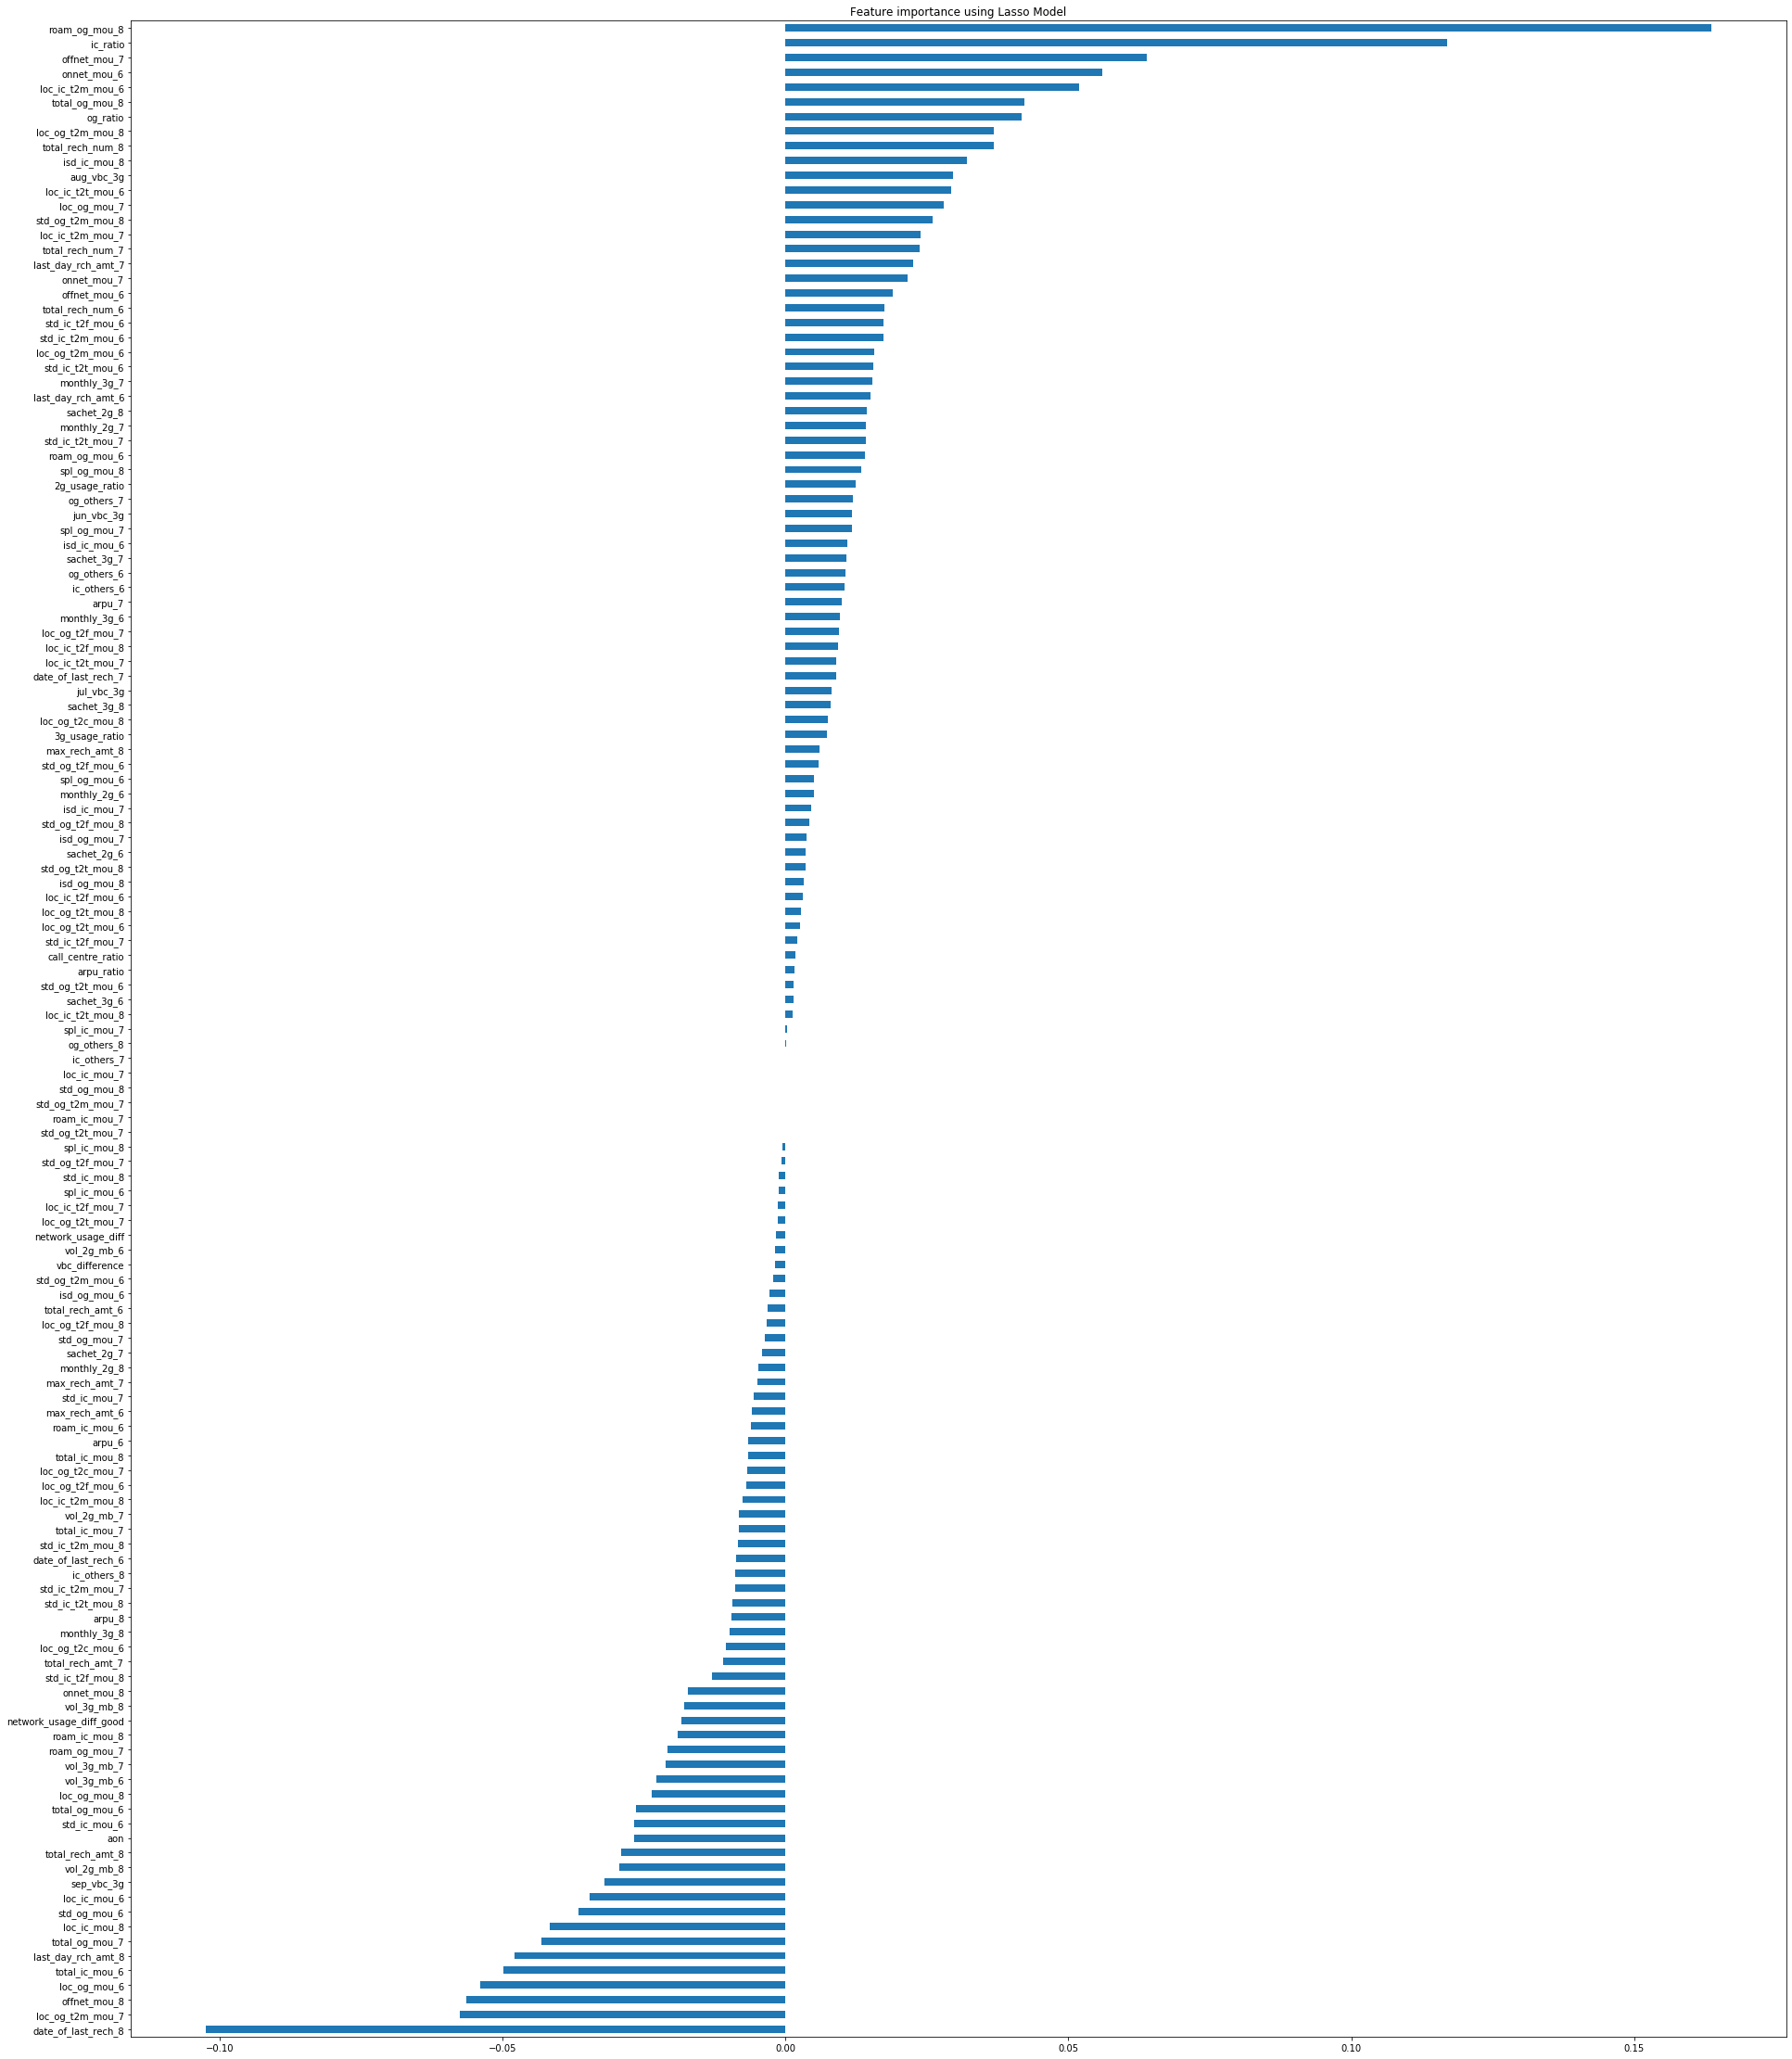

In [79]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (32, 40)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [80]:
# The best indicators of churn in reverse order are:
imp_coef.tail(10)

isd_ic_mou_8       0.032032
total_rech_num_8   0.036799
loc_og_t2m_mou_8   0.036916
og_ratio           0.041698
total_og_mou_8     0.042296
loc_ic_t2m_mou_6   0.051904
onnet_mou_6        0.056034
offnet_mou_7       0.063856
ic_ratio           0.116924
roam_og_mou_8      0.163549
dtype: float64

In [81]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [82]:
# Logistic regression model, first training model
logm1 = sm.GLM(list(y_train),(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                37972
Model:                            GLM   Df Residuals:                    37834
Model Family:                Binomial   Df Model:                          137
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9253.1
Date:                Sun, 21 Jun 2020   Deviance:                       18506.
Time:                        00:04:08   Pearson chi2:                 5.98e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0432      0.026      1.677      0.094      -0.007       0.094
arpu_6                     -0.1333      0.049     -2.700      0.007      -0.230      -0.037
arpu_7                      0.0635      0.056      1.141      0.254      -0.046       0.173
arpu_8                     -0.0486      0.039     -1.238      0.216      -0.126       0.028
onnet_mou_6                 0.7841      0.085      9.244      0.000       0.618       0.950
onnet_mou_7                 0.3237      0.073      4.416      0.000       0.180       0.467
onnet_mou_8                -0.0161      0.082     -0.197      0.844      -0.177       0.145
offnet_mou_6                0.0830      0.071      1.178      0.239      -0.055       0.221
offnet_mou_7                0.7280      0.074      9.821      0.000       0.583       0.873
offnet_mou_8               -0.5482      0.072     -7.609      0.000      -0.689      -0.407
roam_ic_mou_6              -0.0885      0.047     -1.881      0.060      -0.181       0.004
roam_ic_mou_7               0.0261      0.022      1.172      0.241      -0.018       0.070
roam_ic_mou_8              -0.2058      0.030     -6.942      0.000      -0.264      -0.148
roam_og_mou_6               0.1724      0.032      5.448      0.000       0.110       0.234
roam_og_mou_7              -0.2012      0.029     -6.850      0.000      -0.259      -0.144
roam_og_mou_8               1.2041      0.026     46.195      0.000       1.153       1.255
loc_og_t2t_mou_6            0.1469      0.067      2.193      0.028       0.016       0.278
loc_og_t2t_mou_7           -0.1972      0.054     -3.644      0.000      -0.303      -0.091
loc_og_t2t_mou_8            0.2180      0.054      4.011      0.000       0.111       0.325
loc_og_t2m_mou_6            0.2556      0.110      2.328      0.020       0.040       0.471
loc_og_t2m_mou_7           -0.9814      0.081    -12.125      0.000      -1.140      -0.823
loc_og_t2m_mou_8            0.8071      0.083      9.679      0.000       0.644       0.971
loc_og_t2f_mou_6           -0.0819      0.032     -2.577      0.010      -0.144      -0.020
loc_og_t2f_mou_7            0.1418      0.033      4.332      0.000       0.078       0.206
loc_og_t2f_mou_8           -0.0388      0.034     -1.158      0.247      -0.105       0.027
loc_og_t2c_mou_6           -0.0345      0.034     -1.028      0.304      -0.100       0.031
loc_og_t2c_mou_7           -0.0551      0.034     -1.643      0.100      -0.121       0.011
loc_og_t2c_mou_8            0.0664      0.035      1.884      0.060      -0.003       0.135
loc_og_mou_6               -0.7224      0.145     -4.984      0.000      -1.006      -0.438
loc_og_mou_7                0.8999      0.102      8.842      0.000       0.700       1.099
loc_og_mou_8               -1.2524      0.112  

### RFE

In [83]:
logreg = LogisticRegression()

In [84]:
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [85]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True, False, False,  True, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,

In [86]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 44),
 ('arpu_7', False, 92),
 ('arpu_8', False, 93),
 ('onnet_mou_6', False, 6),
 ('onnet_mou_7', False, 28),
 ('onnet_mou_8', False, 119),
 ('offnet_mou_6', False, 88),
 ('offnet_mou_7', False, 2),
 ('offnet_mou_8', False, 3),
 ('roam_ic_mou_6', False, 80),
 ('roam_ic_mou_7', False, 110),
 ('roam_ic_mou_8', False, 21),
 ('roam_og_mou_6', False, 47),
 ('roam_og_mou_7', False, 38),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 59),
 ('loc_og_t2t_mou_7', False, 62),
 ('loc_og_t2t_mou_8', False, 48),
 ('loc_og_t2m_mou_6', False, 43),
 ('loc_og_t2m_mou_7', False, 4),
 ('loc_og_t2m_mou_8', False, 5),
 ('loc_og_t2f_mou_6', False, 77),
 ('loc_og_t2f_mou_7', False, 64),
 ('loc_og_t2f_mou_8', False, 103),
 ('loc_og_t2c_mou_6', False, 108),
 ('loc_og_t2c_mou_7', False, 83),
 ('loc_og_t2c_mou_8', False, 84),
 ('loc_og_mou_6', False, 9),
 ('loc_og_mou_7', False, 7),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_6', False, 97),
 ('std_og_t2t_mou_7', False, 91),
 ('std

In [87]:
col = X_train.columns[rfe.support_]
col

Index(['roam_og_mou_8', 'loc_og_mou_8', 'std_og_mou_6', 'total_og_mou_8',
       'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_mou_6',
       'total_ic_mou_6', 'isd_ic_mou_8', 'total_rech_num_8',
       'total_rech_amt_8', 'date_of_last_rech_8', 'last_day_rch_amt_8',
       'sep_vbc_3g', 'ic_ratio'],
      dtype='object')

In [88]:
X_train.columns[~rfe.support_]

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'jul_vbc_3g', 'jun_vbc_3g', 'arpu_ratio', 'call_centre_ratio',
       'network_usage_diff', 'network_usage_diff_good', '2g_usage_ratio',
       '3g_usage_ratio', 'og_ratio', 'vbc_difference'],
      dtype='object', length=122)

### Model Assessment with stats model

In [89]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(list(y_train),X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                37972
Model:                            GLM   Df Residuals:                    37956
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10811.
Date:                Sun, 21 Jun 2020   Deviance:                       21621.
Time:                        00:09:01   Pearson chi2:                 5.61e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1300      0.020      6.646      0.000       0.092       0.168
roam_og_mou_8           1.1014      0.019     57.239      0.000       1.064       1.139
loc_og_mou_8           -0.6917      0.043    -16.024      0.000      -0.776      -0.607
std_og_mou_6           -0.2183      0.025     -8.849      0.000      -0.267      -0.170
total_og_mou_8          0.3724      0.039      9.441      0.000       0.295       0.450
loc_ic_t2t_mou_6        0.6163      0.041     15.136      0.000       0.536       0.696
loc_ic_t2m_mou_6        1.0757      0.073     14.731      0.000       0.933       1.219
loc_ic_mou_6           -1.2385      0.119    -10.424      0.000      -1.471      -1.006
total_ic_mou_6         -0.6352      0.047    -13.633      0.000      -0.726      -0.544
isd_ic_mou_8            0.3765      0.019     19.421      0.000       0.339       0.415
total_rech_num_8        0.7642      0.031     24.330      0.000       0.703       0.826
total_rech_amt_8       -0.4802      0.042    -11.568      0.000      -0.562      -0.399
date_of_last_rech_8    -1.0946      0.022    -48.681      0.000      -1.139      -1.051
last_day_rch_amt_8     -0.4367      0.022    -19.594      0.000      -0.480      -0.393
sep_vbc_3g             -0.5461      0.028    -19.366      0.000      -0.601      -0.491
ic_ratio                1.3772      0.034     40.328      0.000       1.310       1.444
=======================================================================================
"""

### Adding the probablity column

Now we add the probablity column as well as the prediction column in order to make our predictions.

In [90]:
# Get the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0   0.124086
1   0.018425
2   0.116464
3   0.541783
4   0.872774
5   0.004747
6   0.053441
7   0.011021
8   0.539255
9   0.191624
dtype: float64

In [91]:
y_train_pred_final = pd.DataFrame({'Churned':y_train.values, 'Churn_Prob':y_train_pred})

In [92]:
y_train_pred_final.head()

,Churned,Churn_Prob
0,0,0.124086
1,0,0.018425
2,0,0.116464
3,1,0.541783
4,1,0.872774


In [93]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.035 else 0)

y_train_pred_final.head()

,Churned,Churn_Prob,predicted
0,0,0.124086,1
1,0,0.018425,0
2,0,0.116464,1
3,1,0.541783,1
4,1,0.872774,1


## Confusion Metrics

In [94]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics

In [95]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churned, y_train_pred_final.predicted )
print(confusion)

[[ 6154 12832]
 [   40 18946]]


In [96]:
#overall accuracy check
print(metrics.accuracy_score(y_train_pred_final.Churned, y_train_pred_final.predicted))

0.6610133782787317


## VIFs

In [97]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,loc_ic_mou_6,37.470000
5,loc_ic_t2m_mou_6,14.040000
7,total_ic_mou_6,6.690000
10,total_rech_amt_8,6.330000
3,total_og_mou_8,5.530000
4,loc_ic_t2t_mou_6,4.650000
14,ic_ratio,3.930000
1,loc_og_mou_8,3.570000
9,total_rech_num_8,3.000000
12,last_day_rch_amt_8,2.060000


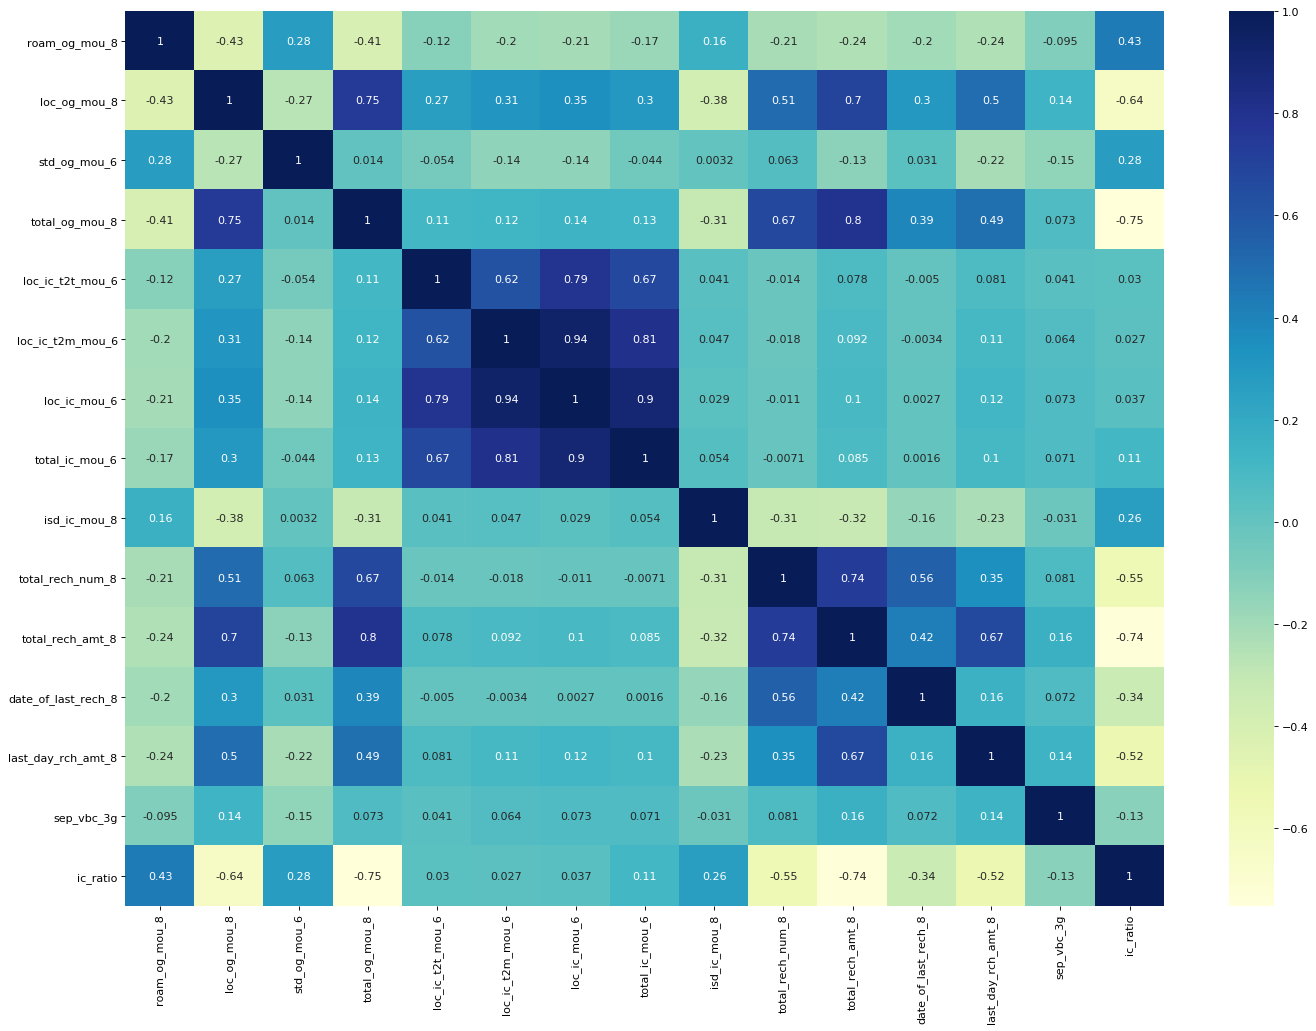

In [98]:
plt.figure(figsize=(18,13), dpi=80, facecolor='w', edgecolor='k', frameon='True')

cor = X_train[col].corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")

plt.tight_layout()
plt.show()

### Removal of variables and updation of the Model

Some of the variable have high VIFs although the p-value of them are in a good state. Those variables are insignificant and can be dropped.

In [99]:
col = col.drop('loc_ic_mou_6', 1)
col

Index(['roam_og_mou_8', 'loc_og_mou_8', 'std_og_mou_6', 'total_og_mou_8',
       'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'total_ic_mou_6',
       'isd_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_8',
       'date_of_last_rech_8', 'last_day_rch_amt_8', 'sep_vbc_3g', 'ic_ratio'],
      dtype='object')

In [100]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(list(y_train),X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                37972
Model:                            GLM   Df Residuals:                    37957
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10866.
Date:                Sun, 21 Jun 2020   Deviance:                       21732.
Time:                        00:09:08   Pearson chi2:                 5.63e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1392      0.019      7.138      0.000       0.101       0.177
roam_og_mou_8           1.1076      0.019     57.742      0.000       1.070       1.145
loc_og_mou_8           -0.7035      0.043    -16.271      0.000      -0.788      -0.619
std_og_mou_6           -0.1764      0.024     -7.249      0.000      -0.224      -0.129
total_og_mou_8          0.3535      0.039      8.982      0.000       0.276       0.431
loc_ic_t2t_mou_6        0.2865      0.025     11.523      0.000       0.238       0.335
loc_ic_t2m_mou_6        0.3956      0.032     12.496      0.000       0.334       0.458
total_ic_mou_6         -0.9567      0.035    -27.059      0.000      -1.026      -0.887
isd_ic_mou_8            0.4010      0.019     20.860      0.000       0.363       0.439
total_rech_num_8        0.7650      0.031     24.418      0.000       0.704       0.826
total_rech_amt_8       -0.4694      0.041    -11.364      0.000      -0.550      -0.388
date_of_last_rech_8    -1.0931      0.022    -48.724      0.000      -1.137      -1.049
last_day_rch_amt_8     -0.4346      0.022    -19.565      0.000      -0.478      -0.391
sep_vbc_3g             -0.5485      0.028    -19.578      0.000      -0.603      -0.494
ic_ratio                1.3626      0.034     40.071      0.000       1.296       1.429
=======================================================================================
"""

In [101]:
# Get the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0   0.126904
1   0.018766
2   0.123741
3   0.479809
4   0.963056
5   0.004535
6   0.049943
7   0.012183
8   0.572690
9   0.176550
dtype: float64

In [102]:
y_train_pred_final = pd.DataFrame({'Churned':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final.head()

,Churned,Churn_Prob
0,0,0.126904
1,0,0.018766
2,0,0.123741
3,1,0.479809
4,1,0.963056


In [103]:
values = y_train_pred_final.Churned * y_train_pred_final.Churn_Prob
m = values.mean()
m

0.41379908809426486

In [104]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > m else 0)
y_train_pred_final.head()

,Churned,Churn_Prob,predicted
0,0,0.126904,0
1,0,0.018766,0
2,0,0.123741,0
3,1,0.479809,1
4,1,0.963056,1


In [105]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churned, y_train_pred_final.predicted )
print(confusion)

[[16447  2539]
 [ 1773 17213]]


In [106]:
print(metrics.accuracy_score(y_train_pred_final.Churned, y_train_pred_final.predicted))

0.8864426419466975


In [107]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,total_rech_amt_8,6.330000
3,total_og_mou_8,5.520000
13,ic_ratio,3.930000
6,total_ic_mou_6,3.890000
1,loc_og_mou_8,3.570000
5,loc_ic_t2m_mou_6,3.170000
8,total_rech_num_8,3.000000
11,last_day_rch_amt_8,2.060000
4,loc_ic_t2t_mou_6,1.920000
2,std_og_mou_6,1.620000


### Remove the Variable and Update the Model

In [108]:
col = col.drop('loc_ic_t2m_mou_6', 1)
col

Index(['roam_og_mou_8', 'loc_og_mou_8', 'std_og_mou_6', 'total_og_mou_8',
       'loc_ic_t2t_mou_6', 'total_ic_mou_6', 'isd_ic_mou_8',
       'total_rech_num_8', 'total_rech_amt_8', 'date_of_last_rech_8',
       'last_day_rch_amt_8', 'sep_vbc_3g', 'ic_ratio'],
      dtype='object')

In [109]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(list(y_train),X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                37972
Model:                            GLM   Df Residuals:                    37958
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10946.
Date:                Sun, 21 Jun 2020   Deviance:                       21893.
Time:                        00:09:19   Pearson chi2:                 5.27e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1294      0.019      6.680      0.000       0.091       0.167
roam_og_mou_8           1.0895      0.019     57.334      0.000       1.052       1.127
loc_og_mou_8           -0.6447      0.042    -15.326      0.000      -0.727      -0.562
std_og_mou_6           -0.1812      0.024     -7.488      0.000      -0.229      -0.134
total_og_mou_8          0.3223      0.039      8.283      0.000       0.246       0.399
loc_ic_t2t_mou_6        0.3542      0.024     14.776      0.000       0.307       0.401
total_ic_mou_6         -0.6933      0.027    -25.455      0.000      -0.747      -0.640
isd_ic_mou_8            0.4077      0.019     21.418      0.000       0.370       0.445
total_rech_num_8        0.7491      0.031     24.076      0.000       0.688       0.810
total_rech_amt_8       -0.4631      0.041    -11.336      0.000      -0.543      -0.383
date_of_last_rech_8    -1.0924      0.022    -48.915      0.000      -1.136      -1.049
last_day_rch_amt_8     -0.4434      0.022    -20.094      0.000      -0.487      -0.400
sep_vbc_3g             -0.5533      0.028    -19.913      0.000      -0.608      -0.499
ic_ratio                1.3420      0.033     40.128      0.000       1.276       1.408
=======================================================================================
"""

In [110]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0   0.161059
1   0.016825
2   0.118684
3   0.517126
4   0.984913
5   0.004116
6   0.047001
7   0.013626
8   0.566575
9   0.167814
dtype: float64

In [111]:
y_train_pred_final = pd.DataFrame({'Churned':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final.head()

,Churned,Churn_Prob
0,0,0.161059
1,0,0.016825
2,0,0.118684
3,1,0.517126
4,1,0.984913


In [112]:
values = y_train_pred_final.Churned * y_train_pred_final.Churn_Prob
m = values.mean()
m

0.4129362397824079

In [113]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > m else 0)
y_train_pred_final.head()

,Churned,Churn_Prob,predicted
0,0,0.161059,0
1,0,0.016825,0
2,0,0.118684,0
3,1,0.517126,1
4,1,0.984913,1


In [114]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churned, y_train_pred_final.predicted )
print(confusion)

[[16364  2622]
 [ 1801 17185]]


In [115]:
print(metrics.accuracy_score(y_train_pred_final.Churned, y_train_pred_final.predicted))

0.883519435373433


In [116]:
#VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,total_rech_amt_8,6.330000
3,total_og_mou_8,5.510000
12,ic_ratio,3.920000
1,loc_og_mou_8,3.530000
7,total_rech_num_8,3.000000
5,total_ic_mou_6,2.270000
10,last_day_rch_amt_8,2.060000
4,loc_ic_t2t_mou_6,1.880000
2,std_og_mou_6,1.610000
0,roam_og_mou_8,1.580000


### Remove the Variable and Update the Model

In [119]:
col = col.drop('total_rech_amt_8', 1)
col

Index(['roam_og_mou_8', 'loc_og_mou_8', 'std_og_mou_6', 'total_og_mou_8',
       'loc_ic_t2t_mou_6', 'total_ic_mou_6', 'isd_ic_mou_8',
       'total_rech_num_8', 'date_of_last_rech_8', 'last_day_rch_amt_8',
       'sep_vbc_3g', 'ic_ratio'],
      dtype='object')

In [120]:
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(list(y_train),X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                37972
Model:                            GLM   Df Residuals:                    37959
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11011.
Date:                Sun, 21 Jun 2020   Deviance:                       22023.
Time:                        00:37:30   Pearson chi2:                 5.27e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1194      0.019      6.183      0.000       0.082       0.157
roam_og_mou_8           1.0236      0.018     57.098      0.000       0.988       1.059
loc_og_mou_8           -0.6791      0.042    -16.246      0.000      -0.761      -0.597
std_og_mou_6           -0.1512      0.024     -6.315      0.000      -0.198      -0.104
total_og_mou_8          0.2034      0.037      5.445      0.000       0.130       0.277
loc_ic_t2t_mou_6        0.3561      0.024     14.879      0.000       0.309       0.403
total_ic_mou_6         -0.7083      0.027    -26.095      0.000      -0.762      -0.655
isd_ic_mou_8            0.3970      0.019     21.002      0.000       0.360       0.434
total_rech_num_8        0.5856      0.027     21.301      0.000       0.532       0.639
date_of_last_rech_8    -1.0974      0.022    -49.398      0.000      -1.141      -1.054
last_day_rch_amt_8     -0.5600      0.019    -28.750      0.000      -0.598      -0.522
sep_vbc_3g             -0.5932      0.028    -21.124      0.000      -0.648      -0.538
ic_ratio                1.4251      0.033     43.449      0.000       1.361       1.489
=======================================================================================
"""

In [121]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0   0.162172
1   0.023831
2   0.104768
3   0.495321
4   0.985894
5   0.004439
6   0.056986
7   0.014446
8   0.566783
9   0.158375
dtype: float64

In [122]:
y_train_pred_final = pd.DataFrame({'Churned':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final.head()

,Churned,Churn_Prob
0,0,0.162172
1,0,0.023831
2,0,0.104768
3,1,0.495321
4,1,0.985894


In [123]:
values = y_train_pred_final.Churned * y_train_pred_final.Churn_Prob
m = values.mean()
m

0.4123925668183196

In [124]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > m else 0)
y_train_pred_final.head()

,Churned,Churn_Prob,predicted
0,0,0.162172,0
1,0,0.023831,0
2,0,0.104768,0
3,1,0.495321,1
4,1,0.985894,1


In [125]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churned, y_train_pred_final.predicted )
print(confusion)

[[16315  2671]
 [ 1774 17212]]


In [126]:
print(metrics.accuracy_score(y_train_pred_final.Churned, y_train_pred_final.predicted))

0.8829400610976509


In [127]:
# VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,total_og_mou_8,4.950000
11,ic_ratio,3.720000
1,loc_og_mou_8,3.480000
7,total_rech_num_8,2.400000
5,total_ic_mou_6,2.260000
4,loc_ic_t2t_mou_6,1.880000
2,std_og_mou_6,1.590000
9,last_day_rch_amt_8,1.520000
8,date_of_last_rech_8,1.480000
0,roam_og_mou_8,1.410000


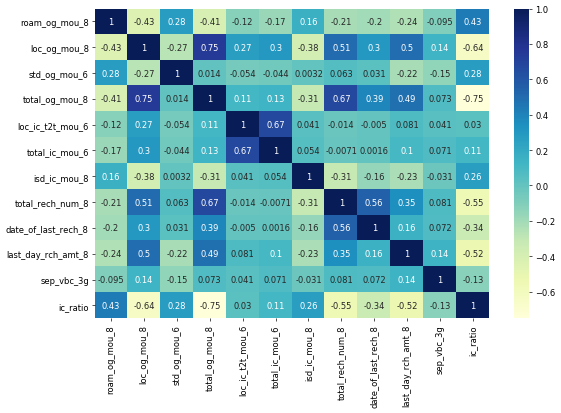

In [128]:
plt.figure(figsize=(10,7), dpi=60, facecolor='w', edgecolor='k', frameon='True')

cor = X_train[col].corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")

plt.tight_layout()
plt.show()

### Remove the Variable and Update the Model

In [129]:
col = col.drop('total_og_mou_8', 1)
col

Index(['roam_og_mou_8', 'loc_og_mou_8', 'std_og_mou_6', 'loc_ic_t2t_mou_6',
       'total_ic_mou_6', 'isd_ic_mou_8', 'total_rech_num_8',
       'date_of_last_rech_8', 'last_day_rch_amt_8', 'sep_vbc_3g', 'ic_ratio'],
      dtype='object')

In [130]:
X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(list(y_train),X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                37972
Model:                            GLM   Df Residuals:                    37960
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11026.
Date:                Sun, 21 Jun 2020   Deviance:                       22052.
Time:                        00:38:11   Pearson chi2:                 5.33e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1225      0.019      6.341      0.000       0.085       0.160
roam_og_mou_8           1.0079      0.018     57.061      0.000       0.973       1.042
loc_og_mou_8           -0.5617      0.035    -15.897      0.000      -0.631      -0.492
std_og_mou_6           -0.0803      0.020     -4.010      0.000      -0.120      -0.041
loc_ic_t2t_mou_6        0.3482      0.024     14.570      0.000       0.301       0.395
total_ic_mou_6         -0.6968      0.027    -25.812      0.000      -0.750      -0.644
isd_ic_mou_8            0.3963      0.019     21.042      0.000       0.359       0.433
total_rech_num_8        0.6359      0.026     24.558      0.000       0.585       0.687
date_of_last_rech_8    -1.1014      0.022    -49.645      0.000      -1.145      -1.058
last_day_rch_amt_8     -0.5528      0.019    -28.450      0.000      -0.591      -0.515
sep_vbc_3g             -0.5996      0.028    -21.332      0.000      -0.655      -0.545
ic_ratio                1.3538      0.030     45.108      0.000       1.295       1.413
=======================================================================================
"""

In [131]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0   0.170456
1   0.024587
2   0.110412
3   0.495753
4   0.983906
5   0.004897
6   0.057376
7   0.015354
8   0.543763
9   0.154038
dtype: float64

In [132]:
y_train_pred_final = pd.DataFrame({'Churned':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final.head()

,Churned,Churn_Prob
0,0,0.170456
1,0,0.024587
2,0,0.110412
3,1,0.495753
4,1,0.983906


In [133]:
values = y_train_pred_final.Churned * y_train_pred_final.Churn_Prob
m = values.mean()
m

0.4123475160664046

In [134]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > m else 0)
y_train_pred_final.head()

,Churned,Churn_Prob,predicted
0,0,0.170456,0
1,0,0.024587,0
2,0,0.110412,0
3,1,0.495753,1
4,1,0.983906,1


In [135]:
confusion = metrics.confusion_matrix(y_train_pred_final.Churned, y_train_pred_final.predicted )
print(confusion)

[[16333  2653]
 [ 1786 17200]]


In [136]:
print(metrics.accuracy_score(y_train_pred_final.Churned, y_train_pred_final.predicted))

0.8830980722637733


In [137]:
# VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,ic_ratio,2.780000
1,loc_og_mou_8,2.770000
4,total_ic_mou_6,2.220000
6,total_rech_num_8,2.160000
3,loc_ic_t2t_mou_6,1.870000
8,last_day_rch_amt_8,1.520000
7,date_of_last_rech_8,1.470000
0,roam_og_mou_8,1.390000
2,std_og_mou_6,1.280000
5,isd_ic_mou_8,1.260000


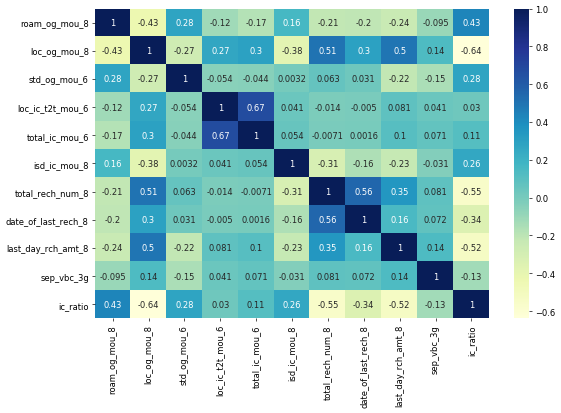

In [138]:
plt.figure(figsize=(10,7), dpi=60, facecolor='w', edgecolor='k', frameon='True')

cor = X_train[col].corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")

plt.tight_layout()
plt.show()

## Our latest models features are as follows:

1. All variables have p-values equal to 0.
2. All the features have very low VIF values (less than 2) that means there is less muliticollinearity among the features as per heat map.
3. The overall accuracy of 0.77 at a probability threshold of 0.05 is quite acceptable. So we shouldn't drop more variables and we should proceed with the predictions using this model.

## Calculating Sensitivity and Specificity

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# sensitivity of our logistic regression model
TP / float(TP+FN)

In [ ]:
# calculate specificity
TN / float(TN+FP)

In [ ]:
# false postive rate
print(FP/ float(TN+FP))

In [ ]:
# positive predicted value 
print (TP / float(TP+FP))

In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

In [ ]:
### ROC Curve

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churned, y_train_pred_final.Churn_Prob, drop_intermediate = False )

In [ ]:
draw_roc(y_train_pred_final.Churned, y_train_pred_final.Churn_Prob)

In [ ]:
### The area under the curve

In [ ]:
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

In [ ]:
auc = auc_val(fpr,tpr)
auc

## Finding the Probablity Cutoff Point

In [ ]:
# create columns with different probability cutoffs 
num = [float(x)/10 for x in range(10)]
for i in num:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

In [ ]:
#calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churned, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

In [ ]:
### Plot of the accuracy, sensitivity and specificity for various probabilities

In [ ]:
sns.set_style("whitegrid") 
sns.set_context("paper") 
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize=(12,8))
#plt.xticks(np.arange(0, 1, step=0.05), size = 15)
plt.xticks(np.arange(0, 1, step=0.05), size = 15)                    
plt.yticks(size = 15)
plt.show()



In [ ]:
### 0.525 is the optimum point to take it as a cutoff probability

In [ ]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.525 else 0)

y_train_pred_final.head()

In [ ]:
metrics.accuracy_score(y_train_pred_final.Churned, y_train_pred_final.final_predicted)

In [ ]:
confusion1 = metrics.confusion_matrix(y_train_pred_final.Churned, y_train_pred_final.final_predicted)
confusion1

In [ ]:
TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

In [ ]:
#sensitivity 
TP / float(TP+FN)

In [ ]:
#specificity
TN / float(TN+FP)

In [ ]:
#false postive rate
print(FP/ float(TN+FP))

In [ ]:
# Positive predictive value 
print (TP / float(TP+FP))

In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

In [ ]:
# Precision and Recall

In [ ]:
precision = confusion1[1,1]/(confusion1[0,1]+confusion1[1,1])
precision

In [ ]:
recall = confusion1[1,1]/(confusion1[1,0]+confusion1[1,1])
recall

In [ ]:
precision_score(y_train_pred_final.Churned, y_train_pred_final.final_predicted)

In [ ]:
recall_score(y_train_pred_final.Churned, y_train_pred_final.final_predicted)

In [ ]:
y_train_pred_final.Churned, y_train_pred_final.final_predicted

In [ ]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churned, y_train_pred_final.Churn_Prob)

In [ ]:
plt.figure(figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k', frameon='True')
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0, 1, step=0.05))
plt.show()

### The optimal threshold value is 0.525

In [ ]:
# F1 score
F1 = 2*(precision*recall)/(precision+recall)
F1

In [ ]:
# Making predictions on the test set
X_test1 = X_test # Added by Madhu
X_test = X_test[col]
X_test.head()

In [ ]:
X_test_sm = sm.add_constant(X_test)

In [ ]:
y_test_pred = res.predict(X_test_sm)

In [ ]:
y_test_pred[:10]

In [ ]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [ ]:
y_pred_1.head()

In [ ]:
y_test_df = pd.DataFrame(y_test)

In [ ]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [ ]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [ ]:
y_pred_final.head()

In [ ]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

In [ ]:
y_pred_final.head()

In [ ]:
y_pred_final.shape

In [ ]:
# Using the probability threshold value 0f 0.525 on the test dataset to predict if a churn will take place.

y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.525 else 0)

In [ ]:
y_pred_final.head()

In [ ]:
#accuracy.
acc_score=metrics.accuracy_score(y_pred_final.churn_data, y_pred_final.final_predicted)
acc_score

In [ ]:
confusion_test = metrics.confusion_matrix(y_pred_final.churn_data, y_pred_final.final_predicted )
print(confusion_test)

In [ ]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [ ]:
#sensitivity
TP / float(TP+FN)

In [ ]:
#specificity
TN / float(TN+FP)

In [ ]:
# false postive rate
print(FP/ float(TN+FP))

In [ ]:
# Positive predictive value 
print (TP / float(TP+FP))

In [ ]:
# Negative predictive value
print (TN / float(TN+ FN))

In [ ]:
Precision = confusion_test[1,1]/(confusion_test[0,1]+confusion_test[1,1])
Precision

In [ ]:
Recall = confusion_test[1,1]/(confusion_test[1,0]+confusion_test[1,1])
Recall

In [ ]:
F1 = 2*(Precision*Recall)/(Precision+Recall)
F1

In [ ]:
print(classification_report(y_pred_final.churn_data, y_pred_final.final_predicted))

In [ ]:
# Cross Validation Score To avoid overfitting, calculate the Cross Validation Score to see how our model performs

In [ ]:
lr = LogisticRegression(solver = 'lbfgs')
scores = cross_val_score(lr, X, y, cv=10)
scores.sort()
accuracy = scores.mean()

print(scores)
print(accuracy)

In [ ]:
# ROC for test data set
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.churn_data, y_pred_final.Churn_Prob, drop_intermediate = False )

In [ ]:
draw_roc(y_pred_final.churn_data, y_pred_final.Churn_Prob)

In [ ]:
# Area under curve
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

In [ ]:
auc = auc_val(fpr,tpr)
auc

As a rule of thumb, an AUC can be classed as follows,

0.90 - 1.00 = excellent

0.80 - 0.90 = good

0.70 - 0.80 = fair

0.60 - 0.70 = poor

0.50 - 0.60 = fail

Auc is 0.87, our model seems to be doing good on the test dataset.

In [ ]:
### Feature Importance
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

In [ ]:
#feature_importance = abs(new_params)
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

In [ ]:
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

In [ ]:
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center', color = 'tab:blue',alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[col].columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()

In [ ]:
### Top 3 feature selection.
pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).head(3)

# PCA

In [ ]:
#Import PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [ ]:
X_train.head()

In [ ]:
pca.fit(X_train)

In [ ]:
print(pca.components_)
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 
                       'PC3':pca.components_[2],'PC4':pca.components_[3],
                       'PC5':pca.components_[4],'PC6':pca.components_[5],
                       'PC7':pca.components_[6],'PC8':pca.components_[7],
                       'PC9':pca.components_[8],'PC10':pca.components_[9],
                       'Feature':colnames})
pcs_df.head(10)

In [ ]:
%matplotlib inline
fig = plt.figure(figsize = (15,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### 40 components explain 95% of variance in the data.

In [ ]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=40)

df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

### Correlation matrix

In [ ]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [ ]:
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [ ]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# Observe that correlations are indeed very close to 0

In [ ]:
#Apply selected components to the test data - 20 components
df_test_pca = pca_final.transform(X_test1)
df_test_pca.shape

# RandomForestClassifier with PCA

In [ ]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced')

# fit
rfc.fit(df_train_pca,y_train)

# Making predictions
y_pred_default = rfc.predict(df_test_pca)

In [ ]:
confusion_rf=confusion_matrix(y_test,y_pred_default)
confusion_rf

In [ ]:
TN = confusion_rf[0,0] # true positive 
TP = confusion_rf[1,1] # true negatives
FP = confusion_rf[0,1] # false positives
FN = confusion_rf[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

### Hyperparameter tuning for RandomForest

In [ ]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

rf_with_pca = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf_with_pca = GridSearchCV(rf_with_pca, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
rf_with_pca.fit(df_train_pca, y_train)

In [ ]:
# scores of GridSearch CV
scores = rf_with_pca.cv_results_
pd.DataFrame(scores)

In [ ]:
# plot accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# GridSearchCV to find optimal n_estimators

# number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'n_estimators': range(100, 150, 40)}

rf = RandomForestClassifier(max_depth=10,class_weight='balanced')

# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                   return_train_score=True)
rf.fit(df_train_pca, y_train)

In [ ]:
scores = rf.cv_results_
pd.DataFrame(scores)

In [ ]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# GridSearchCV to find optimal max_features

n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=10,class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
rf.fit(df_train_pca, y_train)

In [ ]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores)

In [ ]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# GridSearchCV to find optimal min_samples_leaf

n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
rf.fit(df_train_pca, y_train)

In [ ]:
scores = rf.cv_results_
pd.DataFrame(scores)

In [ ]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# GridSearchCV to find optimal min_samples_split

n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True)
rf.fit(df_train_pca, y_train)

In [ ]:
scores = rf.cv_results_
pd.DataFrame(scores)

In [ ]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [8,10],
    'min_samples_leaf': range(100, 200, 100),
    'min_samples_split': range(200, 400, 100),
    'n_estimators': range(200, 400, 100), 
    'max_features': [8, 10, 12]
}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced')

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,refit='recall_score' ,
                          cv = 5, n_jobs=-1, verbose = 1)

In [ ]:
# Fit the grid search to the data
grid_search.fit(df_train_pca, y_train)

In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of ',grid_search.best_score_,' using ',grid_search.best_params_)

In [ ]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=8,
                             n_estimators=300)

In [ ]:
# fit
rfc.fit(df_train_pca,y_train)

In [ ]:
# predict
y_pred_default = rfc.predict(df_test_pca)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print('accuracy_score:  ',accuracy_score(y_test,y_pred_default))

In [ ]:
# Confusion Matrix
confusion_rf_hyper=confusion_matrix(y_test,y_pred_default)
confusion_rf_hyper

In [ ]:
TN = confusion_rf_hyper[0,0] # true positive 
TP = confusion_rf_hyper[1,1] # true negatives
FP = confusion_rf_hyper[0,1] # false positives
FN = confusion_rf_hyper[1,0] # false negatives

print('Accuracy Score:  ',accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

# Recomendation for Model Selection
- Logistic Regression(Lasso and RFE) and Random Forest(with PCA) performed better for customer churn analysis for this particular dataset.
- LogisticRegression is the best model 80% Sensitivity
- Accuracy of RandomForest is highest with 86%


# LogisticRegression

- Accuracy Score : 0.8051458969767197 (With RFE on Test)
- Sensitivity: 0.8065416622774676 (with RFE)


# RandomForest with PCA

- Accuracy Score:   0.8674089068825911
- Sensitivity:  0.727979274611399

In [ ]:
feature_names=list(X_train.columns.values)
res = pd.DataFrame(list(dict(zip(feature_names, rfc.feature_importances_)).items()))
res.columns = ["Feature","Importance"]

In [ ]:
# Top 5 churn indicators 
res.sort_values(by ="Importance").tail(5)

# Features
* Average revenue per user for month 6
* Average revenue per user for month 8
* All kind of calls within the same operator network for month 7
* Average revenue per user for month 7
* Local outgoing within network for month 7

## Business recommendation
>Business should check for the average revenue from customers and local outgoing calls on action months as compared to the good months.